# pytorch

## Quick Start

### Dive into DL - 李沐 - 2021

https://www.bilibili.com/video/BV1Fb4y1D7Jt

#### 数据操作 - 对tensor的各种操作

##### 基本操作

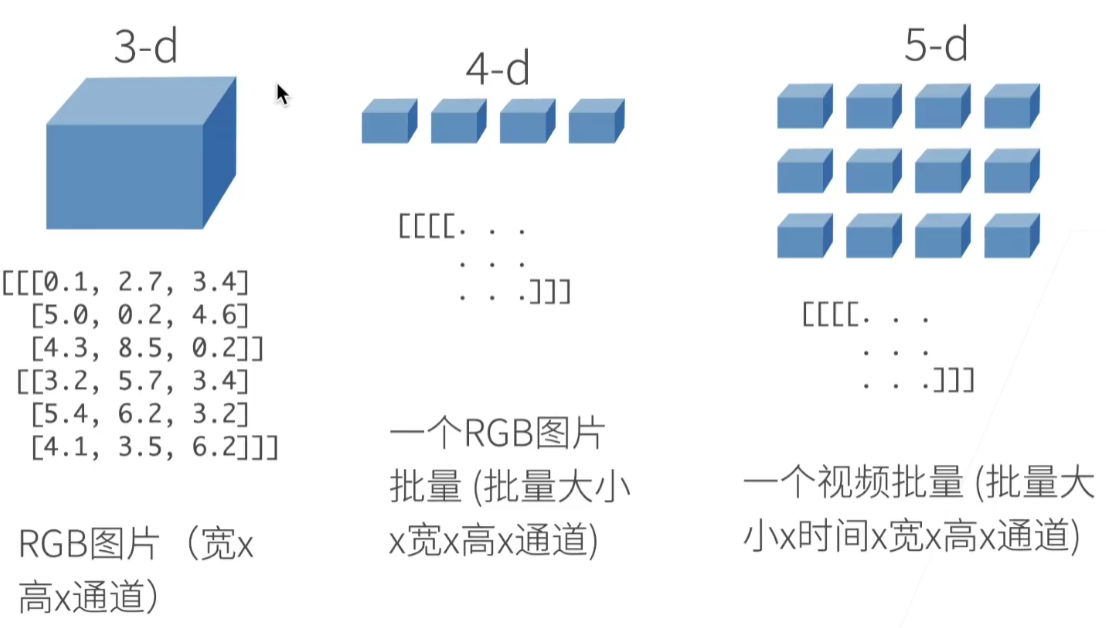

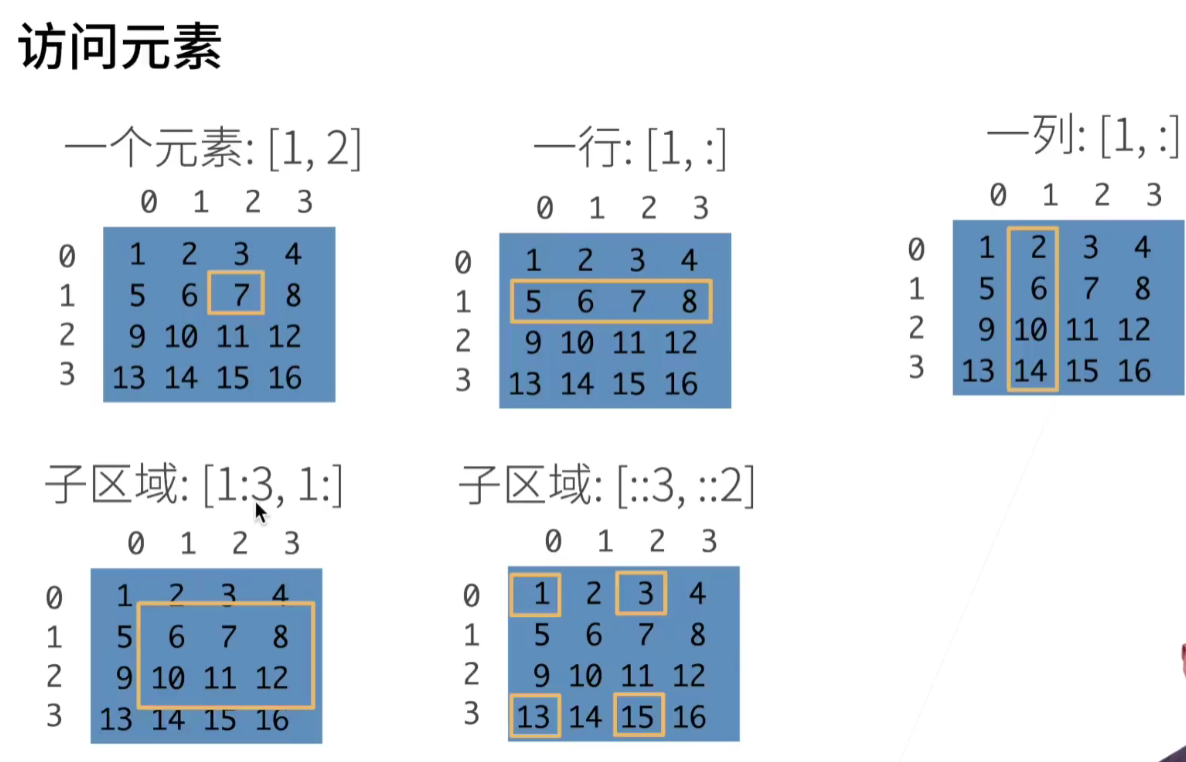

In [1]:
import torch

In [2]:
x = torch.arange(12) # 初始化
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
x.shape

torch.Size([12])

In [4]:
x.numel() # num of element

12

In [5]:
# 更改形状
x = x.reshape(3,4) # 3 * 4 = 12 对不上不行
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [6]:
# 全0张量
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
# 全一张量
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [8]:
# 通过python list来赋值 ,二维数组直接转成tensor
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [9]:
#常见的四则运算可以升级为按元素运算
x = torch.tensor([1.0,2,4,8]) # 第一个用. 则全都是浮点运算
y = torch.tensor([2,2,2,2])
x+y, x-y, x*y , x/y , x**y # **求幂

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [10]:
# 按元素的方式应用更多计算
torch.exp(x) # 指数

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [11]:
# 多个张量连接在一起
X = torch.arange(12,dtype=torch.float32).reshape(3,4)
Y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
torch.cat((X,Y),dim=0), torch.cat((X,Y),dim=1)
# cat即为concate，第一个是第0维合并，就在行合并，就是堆起来
# 第二个是第1维合并，就是按列合并，就是左右拼起来

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [12]:
# 通过逻辑运算符构建二维张量
X == Y # 按元素值进行判断真假返回一个布尔矩阵

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [13]:
# 对张量中所有元素进行求和会产生一个只有一个元素的张量
X.sum()

tensor(66.)

In [14]:
# 从numpy过来的广播机制-broadcasting mechanism
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a,b # 互相扩充到对方的x,y

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [15]:
a+b # 维度还是要一样，比如这里都是数组，维度不一样没戏

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [16]:
# 切片的元素访问
X[-1], X[1:3] # 最后一行 和 1-2行拿出来

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [17]:
# 指定索引写入值
X[1,2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [18]:
# 为多个元素赋值，切片索引
X[0:2,:] = 12 # 0-1行 和 所有列
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [19]:
# 运行一些操作可能会给新结果分配内存
before = id(Y)
Y = Y + X
id(Y) == before

False

In [20]:
# 执行原地操作
Z = torch.zeros_like(Y)
print('id(Z)',id(Z))
Z[:] = X+Y
print('id(Z)',id(Z))

id(Z) 2340878183952
id(Z) 2340878183952


In [21]:
# 如果后续计算中没有重复使用X，也可以使用X[:] = X + Y 或者 X += Y
# 来减少操作的内存开销
before = id(X)
X += Y
id(X) == before

True

In [22]:
# 转换为numpy张量
A = X.numpy()
B = torch.tensor(A)
type(A),type(B)

(numpy.ndarray, torch.Tensor)

In [23]:
# 将大小为1的张量转换为python标量
a = torch.tensor([3.5])
a , a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

##### 答疑

In [34]:
# reshape 和view的区别 - 没有本质区别
a = torch.arange(12)
b = a.reshape((3,4)) # b并没有复制a，b只是创建了一个a的view
b[:] = 2 # 改变了b的元素，a也跟着变了，所以b就是a，只是复制了不同的视图副本，类似软链接
a

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

tensor和numpy很像，但是不一样，pytorch从torch来的，是lua的一个框架，MXNET和numpy比较像，tensor是一个数学上的概念，是一个张量，而numpy的ndarray是计算机概念，数组

In [26]:
# 与Numpy非常类似
a = torch.tensor([1,2,3])
print(a)
print(type(a),'\n')

a = torch.linspace(-1,1,10)
print(a,'\n')

a = torch.randn((1,2))
print(a)

tensor([1, 2, 3])
<class 'torch.Tensor'> 

tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000]) 

tensor([[-0.0062,  1.0299]])


In [ ]:
# 但是Tensor运算可以放在GPU上执行，利用GPU的并行计算加速
a = torch.tensor([1,2]).cuda()  # 无GPU环境无法执行
b = torch.tensor([3,4]).cuda()
print(a+b)

In [ ]:
# pytorch提供梯度的自动计算
# 梯度即为导数在高维度上的推广
a = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([2.0], requires_grad=True)
c = 3 * a **2 -b # 数学计算表达式
c.backward() # 反向传播
print(a.grad)
print(b.grad)
print(c)

#### ⭐数据预处理 - 如何把一个csv文件读进来，变成tensor矩阵！

创建一个人工数据集，存储在csv(逗号分隔值)文件里

In [35]:
import os
os.makedirs(os.path.join('..','made_data'),exist_ok=True)
data_file = os.path.join('..','made_data','house_tiny.csv') # csv意思是每一行是一个数据，每一个entry(域)是用逗号隔开
with open(data_file,'w')as f:
    f.write('NumRooms,Alley,Price\n') # column name
    f.write('NA,Pave,127500\n') # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

从创建的csv文件中加载原始数据集，一般读取csv文件都是用pandas,pandas和numpy对于数据科学家来说至关重要

In [37]:
# 如果没有pandas只需取消下一行的注释
# !pip install pandas
import pandas as pd

data = pd.read_csv(data_file)
print(data) # 在jupyter里不print直接最后一行输出的话用html来显示 更漂亮
data

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000

In [38]:
# 为了处理缺失的数据，典型的方法包括插值和删除，这里考虑使用插值
inputs, outputs = data.iloc[:,0:2], data.iloc[:,2] # 此时data是一个4*3的表，iloc即为index location切片来放input和output
inputs = inputs.fillna(inputs.mean()) # 对于所有的NaN(No a Number)的域的值，使用平均值进行插值
inputs # 由于Alley不是数值，而是字符串，所以没有修改，只对数值域的进行修改

NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN

In [39]:
# 对于inputs中的类别值或离散值，我们将"NaN"视为一个类别
inputs = pd.get_dummies(inputs,dummy_na=True) # 有点像one-hot
inputs

NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1

In [41]:
# 现在inputs和outputs中的所有条目都是数值类型，它们可以转换为张量格式
import torch
x,y = torch.tensor(inputs.values),torch.tensor(outputs.values) # 深度学习的dtype一般用float32，float64太慢了
x,y # 我们现在就把一个csv文件转成一个纯的张量了！！！

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

#### 线性代数的torch实现

In [42]:
# 标量由只有一个元素的张量表示
import torch 
x = torch.tensor([3.0])
y = torch.tensor([2.0])

x+y, x*y, x/y, x**y

(tensor([5.]), tensor([6.]), tensor([1.5000]), tensor([9.]))

In [43]:
# 可以将向量视为标量值组成的列表
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [46]:
# 通过张量的索引来访问任一元素
print(x[3])
# 访问张量的长度
print(len(x))
# 只有一个轴的张量，形状只有一个元素
print(x.shape)

tensor(3)
4
torch.Size([4])


In [47]:
# 通过指定两个分量m和n来创建一个形状为m*n的矩阵
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [48]:
# 矩阵的转置 - 轴对称翻转
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [50]:
# 对称矩阵(symmetric matrix) - A = A^T
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
print(B)
B == B.T

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])


tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [51]:
# 向量是标量的推广，矩阵是向量的推广一样，我们可以构建具有更多轴的数据结构 
X = torch.arange(24).reshape(2,3,4) # 矩阵维度为2(两个矩阵)，3*4的
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [53]:
# 给定具有相同形状的任何两个张量，任何按元素儿远运算的结果都是相同形状的张量
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
B = A.clone() # 在tensor里面如果B=A，只会把其内存地址返回，所以要用clone把A复制一份传给B
A,A+B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [54]:
# 两个矩阵的按元素乘法称为哈达玛积(Hardmard product)-数学符号⊙
A*B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [55]:
# 张量和标量的运算就是直接广播：矩阵所有元素都做一次运算
a = 2
X = torch.arange(24).reshape(2,3,4)
a + X,(a * X). # 所有元素都 +a 和所有元素都乘a

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [56]:
# 计算tensor元素的和
x = torch.arange(4,dtype=torch.float32)
x,x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [73]:
# 表示任意形状张量的元素和
A = torch.arange(20*2,dtype=torch.float32).reshape(2,5,4)
A,A.shape,A.sum()

(tensor([[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.],
          [16., 17., 18., 19.]],
 
         [[20., 21., 22., 23.],
          [24., 25., 26., 27.],
          [28., 29., 30., 31.],
          [32., 33., 34., 35.],
          [36., 37., 38., 39.]]]),
 torch.Size([2, 5, 4]),
 tensor(780.))

In [74]:
# 指定求和汇总张量的轴
A_sum_axis0 = A.sum(axis=0) # 这时候把维度为2的那个轴进行了求和
print(A_sum_axis0,A_sum_axis0.shape)
A_sum_axis0 = A.sum(axis=1) # 这时候把维度为5的那个轴进行了求和
print(A_sum_axis0,A_sum_axis0.shape)
A_sum_axis0 = A.sum(axis=2) # 这时候把维度为4的那个轴进行了求和
A_sum_axis0,A_sum_axis0.shape

tensor([[20., 22., 24., 26.],
        [28., 30., 32., 34.],
        [36., 38., 40., 42.],
        [44., 46., 48., 50.],
        [52., 54., 56., 58.]]) torch.Size([5, 4])
tensor([[ 40.,  45.,  50.,  55.],
        [140., 145., 150., 155.]]) torch.Size([2, 4])


(tensor([[  6.,  22.,  38.,  54.,  70.],
         [ 86., 102., 118., 134., 150.]]),
 torch.Size([2, 5]))

In [75]:
# 按照两个维度求和
A_sum_axis01 = A.sum(axis=[0,1])
A_sum_axis01,A_sum_axis01.shape

(tensor([180., 190., 200., 210.]), torch.Size([4]))

In [76]:
# 一个求和相关的量是平均值(mean或者average)
A.mean(), A.sum()/A.numel()

(tensor(19.5000), tensor(19.5000))

In [77]:
# 按照某个维度进行求平均操作
A.mean(axis=0), A.sum(axis=0)/A.shape[0]

(tensor([[10., 11., 12., 13.],
         [14., 15., 16., 17.],
         [18., 19., 20., 21.],
         [22., 23., 24., 25.],
         [26., 27., 28., 29.]]),
 tensor([[10., 11., 12., 13.],
         [14., 15., 16., 17.],
         [18., 19., 20., 21.],
         [22., 23., 24., 25.],
         [26., 27., 28., 29.]]))

In [78]:
# 计算综合或均值时保持轴数不变 - 按某个维度求和而不想把维度丢掉
sum_A = A.sum(axis =1, keepdim=True)# keepdim后可以做广播
sum_A

tensor([[[ 40.,  45.,  50.,  55.]],

        [[140., 145., 150., 155.]]])

In [79]:
# 在上面的keepdim操作之后，就可以通过广播机制让A除以sum_A
A / sum_A # 不做keepdim的话就不可以做广播

tensor([[[0.0000, 0.0222, 0.0400, 0.0545],
         [0.1000, 0.1111, 0.1200, 0.1273],
         [0.2000, 0.2000, 0.2000, 0.2000],
         [0.3000, 0.2889, 0.2800, 0.2727],
         [0.4000, 0.3778, 0.3600, 0.3455]],

        [[0.1429, 0.1448, 0.1467, 0.1484],
         [0.1714, 0.1724, 0.1733, 0.1742],
         [0.2000, 0.2000, 0.2000, 0.2000],
         [0.2286, 0.2276, 0.2267, 0.2258],
         [0.2571, 0.2552, 0.2533, 0.2516]]])

In [81]:
# 某个轴计算A元素的累加求和
A.cumsum(axis=1) # 就按照那个维度一个一个加下去加到最后一行

tensor([[[  0.,   1.,   2.,   3.],
         [  4.,   6.,   8.,  10.],
         [ 12.,  15.,  18.,  21.],
         [ 24.,  28.,  32.,  36.],
         [ 40.,  45.,  50.,  55.]],

        [[ 20.,  21.,  22.,  23.],
         [ 44.,  46.,  48.,  50.],
         [ 72.,  75.,  78.,  81.],
         [104., 108., 112., 116.],
         [140., 145., 150., 155.]]])

In [82]:
# 点积是相同位置的按元素乘积的和
y = torch.ones(4,dtype=torch.float32)
x,y,torch.dot(x,y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [83]:
# 点积也可以通过执行按元素乘法，然后进行求和来表示
torch.sum(x*y)

tensor(6.)

In [87]:
# 矩阵向量积Ax是一个长度为m的列向量，其i^th元素是点积a_i^Tx
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
A.shape, x.shape, torch.mv(A,x) # mv即为matrix vectormotification

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [89]:
# 我们可以将矩阵乘法AB看作是简单执行m次矩阵-向量积，并将结果拼接在一起，形成一个n*m矩阵
B = torch.ones(4,3) # 5*4与 4*3变成 5*3
torch.mm(A,B) # mm:matrix multiplecation

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

L2范数： 是向量元素平方和的平方根
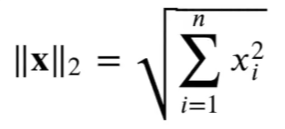

In [90]:
# L2范数： 是向量元素平方和的平方根
u = torch.tensor([3.0, -4.0])
torch.nor

tensor(5.)

L1范数，表示向量元素的绝对值之和
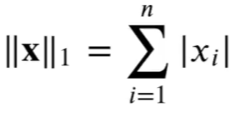

In [91]:
# L1范数，表示向量元素的绝对值之和
torch.abs(u).sum() # 没有内置函数，用两个操作一起即可

tensor(7.)

F范数:弗罗贝乌斯范数(Frobenius norm)是矩阵元素的平方和的平方根
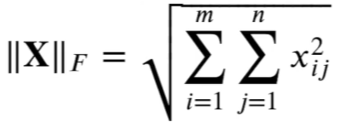

等价于把矩阵拉成一个向量，然后做向量的范数

In [92]:
# 弗罗贝乌斯范数(Frobenius norm)
torch.norm(torch.ones(4,9))

tensor(6.)

#### 自动求导的torch实现

假设我们想对函数y = 2x^Tx 关于列向量x 求导

In [93]:
import torch
x = torch.arange(4.0)
x # 长为4的一个向量

tensor([0., 1., 2., 3.])

In [94]:
# 再我们计算y关于x的梯度之前，我们需要一个地方来存储梯度
x.requires_grad_(True) # require_grad=true后梯度就会存在x.grad里面
x.grad # y关于x的导数是放在这个地方的，默认值是none
# 也可以在创建时候就写好x = torch.arange(4.0,require_grad=true)

In [95]:
# 现在我们计算y
y = 2*torch.dot(x,x) # y = 2x^Tx
y # 隐式的构造了计算图，故有梯度函数告诉你y是从x计算过来的

tensor(28., grad_fn=<MulBackward0>)

In [96]:
# 通过调用反向传播函数来自动计算y关于x每个分量的梯度
y.backward() # 求导
x.grad # 通过x.grad访问我的导数

tensor([ 0.,  4.,  8., 12.])

In [97]:
x.grad == 4*x # 通过计算 2x^Tx即 2x^2的导数应该为 4x

tensor([True, True, True, True])

默认情况下，pytocrh会累积梯度，我们需要清除之前的值

In [101]:
# 清除累积的梯度之后，计算x的另一个函数
x.grad.zero_() # 不清楚则x.grad会把上次留下的梯度累加起来
y = x.sum() # 求向量的sum梯度是全1
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [102]:
# 深度学习中，我们的目的不是计算微分矩阵，而是批量中每个样本单独计算的偏导数之和
# 对非标量的调用backward需要传入一个gradient参数，该参数指定微分函数
x.grad.zero_()
y = x * x # 万一y不是标量的情况，但是DL中很少对向量求导
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward() # 是向量的话，就变成标量再求导
x.grad

tensor([0., 2., 4., 6.])

之前讲的大量向量和矩阵，矩阵和矩阵之间的求导在DL里面使用很少

In [103]:
# 将某些计算移动到记录的计算图之外
x.grad.zero_()
y = x * x
u = y.detach() # 把y当作一个常数，而不是一个函数，此时u是一个常数
z = u * x  # z关于x的导数变成一个常数
# 在要将网络参数固定住的时候是很有用的
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [104]:
# 与上一格对比
x.grad.zero_()
y.sum().backward() # 还是可以通过y来求导，u和y没有关联
x.grad == 2 * x

tensor([True, True, True, True])

In [105]:
# 构建计算图需要通过python控制流(例如，条件、循环或任意函数调用)，我们仍然可以计算得到的变量的梯度
def f(a):
    b = a * 2
    while b.norm() < 1000: # 根据b的值来决定数据流向
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c
# torch把计算图存下来，计算图倒着回去一遍就得到矩阵
a = torch.randn(size=(),requires_grad=True) # a为随机数，size=()为一个标量
d = f(a)
d.backward()

a.grad == d/a

tensor(True)

答疑

    1.显示构造-静态图(符合数学公式的推导方式)，显示构造是先写计算再给值，隐式则不用
    2.传播来说，正向和反向都要算一遍
    3.默认累积梯度:批量操作，一次性算不出所有梯度，所以分开
    4.loss一般是标量，所以不用向量求导
    5.多个loss也需要累加梯度
    6.不做backward是不会去计算梯度的，因为计算梯度很贵的，占用很多内存
    7.求导过程一般是有向图，树状，RNN可以变成环状，但是计算上还是会展开的

在实际中我们很少使用梯度下降，一般用的其实是小批量(batch)随机梯度下降，在整个训练集上算梯度，就是对loss求导，也就是每个样本计算一次差值求和，开销非常大，可能需要很久，所以随机采用b个样本计算近似损失。所以批量大小(batch_size)不能太大也不能太小，太小了利用不到并行最大资源，太大了内存消耗增加，比如样本都相同则计算无用

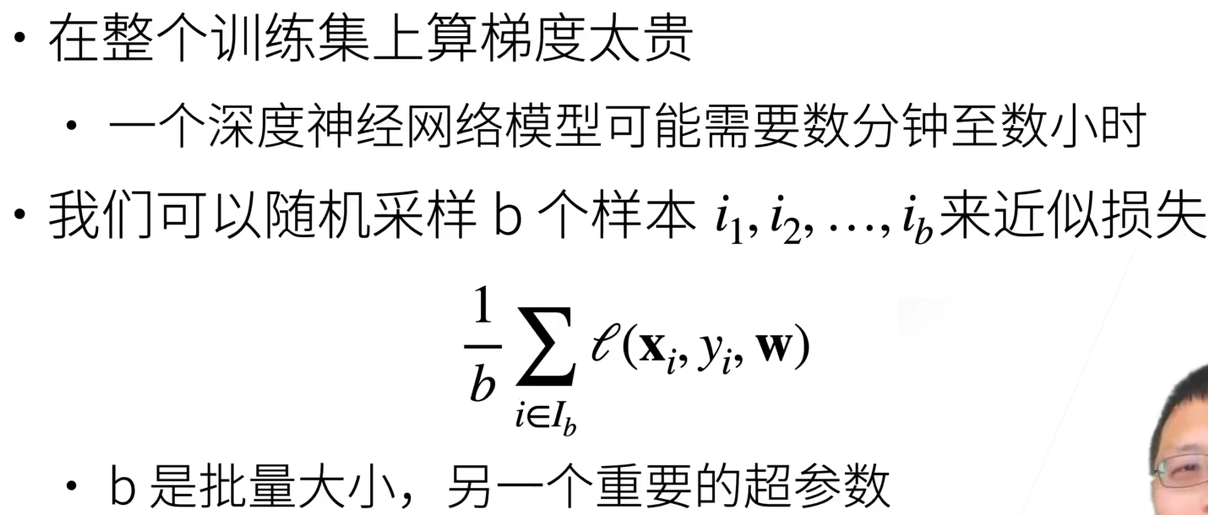

    梯度下降通过不断沿着反梯度方向更新参数求解-不用显示解，只需要不停求梯度
    小批量随机梯度下降是深度学习默认的求解算法
    两个重要的超参是batch_size和learning rate

#### 线性回归的手动从零实现

线性回归模型y = w_1*x_1+w_2*x_2+w_3x_3+b可以看作是单层神经网络

这里将从0开始实现整个方法，包括数据流水线，模型，损失函数和小批量随机梯度下降优化器

In [4]:
%matplotlib inline
# 这一行可以默认plot的时候嵌入到notebook里面
import random
import torch
# from d2l import torch as d2l

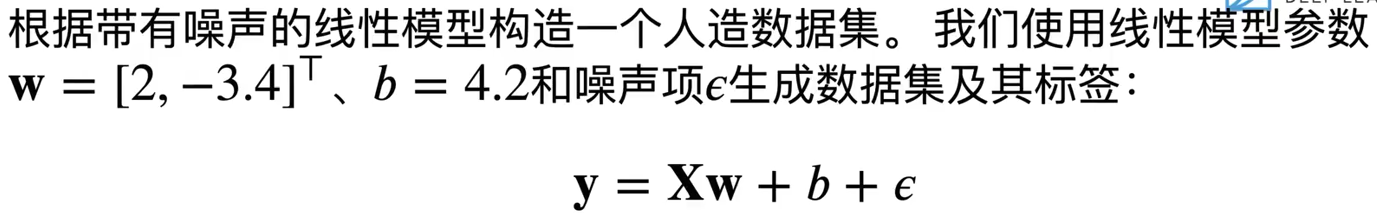

In [9]:
# 构造一个数据集 : 根据带有噪声的线性模型构造一个人造数据集，使用线性模型参数
# w = [2,-3.4]^T,b=4.2和噪声项c生成数据集和标签 y = Xw +b + c
def synthetic_data(w, b, num_examples):
    '''生成y = Xw +b + 噪声'''
    # normal即为正态分布的赋值
    X = torch.normal(0, 1, (num_examples, len(w)))# 均值为0 方差为1 的随机数，numExamples为行len为列
    y = torch.matmul(X, w) + b # y就是X*w+b
    y += torch.normal(0, 0.01, y.shape) # 加入噪音
    return X, y.reshape((-1,1)) # 做成列向量返回

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
features, labels[:10]

(tensor([[-0.8740, -1.1416],
         [-0.9142, -0.3468],
         [ 0.1245,  0.3444],
         ...,
         [-0.4504, -0.1100],
         [ 1.0872,  1.1270],
         [-1.3926, -0.6718]]),
 tensor([[ 6.3369],
         [ 3.5610],
         [ 3.2730],
         [ 6.1725],
         [ 0.3165],
         [ 6.1899],
         [-3.4335],
         [ 4.7525],
         [-1.9309],
         [ 3.1718]]))

In [11]:
# 每次读取一个小batch，定义一个data_iter函数，该函数接收批量大小、特征矩阵和标签向量作为输入
# 生成大小为batch_size的小批量
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples)) # 每个样本的index
    # 这些样本随机读取，没有特定顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):# 每次跳batch_size个大小
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])# batch的index找出来
        yield features[batch_indices], labels[batch_indices] # yield看作迭代器，每次产生一随机样本，拿到即输出
# 每次随机选取batch_size个样本返回出来
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X,'\n', y)
    break

tensor([[ 0.3974, -0.4687],
        [ 1.9770, -1.8527],
        [ 0.5266, -0.4490],
        [-0.6964, -0.6932],
        [-1.6712, -0.6786],
        [-2.2117, -0.8597],
        [ 0.3772,  1.3105],
        [-0.4758,  0.5729],
        [-0.1070, -2.3634],
        [-0.1561, -1.6253]]) 
 tensor([[ 6.5922],
        [14.4378],
        [ 6.7897],
        [ 5.1629],
        [ 3.1586],
        [ 2.6971],
        [ 0.4901],
        [ 1.2819],
        [12.0215],
        [ 9.4071]])


In [28]:
# 定义 初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)#均值为0，方差为1，size为(2,1)的矩阵
b = torch.zeros(1, requires_grad=True) # 一个标量
#需要更新的参数，requires_grad=True就完事了
# 每次要重新训练的话，要把参数随机初始化一次，这样就不会跟着上一次的梯度结果来了

In [14]:
# 定义模型
def linearRegress(X, w, b):
    '''线性回归模型'''
    return torch.matmul(X, w) + b # 矩阵乘向量+偏差就是我们的预测

In [15]:
# 定义损失函数
def squared_loss(y_hat, y):
    '''均方误差损失'''
    return (y_hat - y.reshape(y_hat.shape))**2 / 2 # 一个是向量一个可能是行向量列向量

# 定义优化算法
def SGD(params, lr, batch_size):# params是一个List,里面包含了w和b
    '''小批量随机梯度下降，朝梯度的反方向更新'''
    with torch.no_grad(): # 更新的时候不要参与梯度计算
        for param in params: # 对每一个参数更新，这里是w和b
            param -= lr * param.grad / batch_size # 往梯度反方向更新参数，除以size是求均值，在loss除也可以，一样
            param.grad.zero_() # 最后就可以把梯度清零了，下一次又求新的梯度

In [29]:
from tqdm import tqdm
# 训练过程  可以在这里练习调参的魅力
lr = 0.03 # 太小则loss降很慢，太大则loss会成nan，因为可能除0或者无限的值出现
num_epochs = 10 # 就是把整个数据扫10遍的意思
net = linearRegress # network
loss = squared_loss
# 训练基本都是两层for loop
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels): # 每次拿出一个批量大小的X, y
        l = loss(net(X, w, b), y) # X和y的小批量损失
        # 因为 l 形状是(batch_size, 1)，而不是一个标量。1中的所有元素被加到一起
        # 并以此计算关于[w,b]的梯度
        l.sum().backward() # 求和之后算梯度，有梯度之后就可以更新了
        SGD([w, b], lr, batch_size) # 使用参数的梯度更新参数，其他数据batch_size有可能不被整除，要修改
    with torch.no_grad():# 这里是评价指标
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean())}')

epoch 1, loss 0.051443733274936676
epoch 2, loss 0.0002282365458086133
epoch 3, loss 5.016811337554827e-05
epoch 4, loss 4.927720146952197e-05
epoch 5, loss 4.9577447498450056e-05
epoch 6, loss 4.943214662489481e-05
epoch 7, loss 4.928051930619404e-05
epoch 8, loss 4.935502147418447e-05
epoch 9, loss 4.945681939716451e-05
epoch 10, loss 4.947412890032865e-05


In [30]:
# 比较真实参数和通过训练学到的参数来评估训练的成功程度
print(f'w的估计误差:{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差:{true_b - b}')

w的估计误差:tensor([-0.0003, -0.0007], grad_fn=<SubBackward0>)
b的估计误差:tensor([0.0002], grad_fn=<RsubBackward1>)


#### 线性回归的torch.nn实现

通过使用深度学习框架来简洁实现线性回归模型

In [45]:
# 生成数据集
import numpy as np
import torch
from torch.utils import data

def synthetic_data(w, b, num_examples):
    '''生成y = Xw +b + 噪声'''
    X = torch.normal(0, 1, (num_examples, len(w)))# 均值为0 方差为1 的随机数，numExamples为行len为列
    y = torch.matmul(X, w) + b # y就是X*w+b
    y += torch.normal(0, 0.01, y.shape) # 加入噪音
    return X, y.reshape((-1,1)) # 做成列向量返回

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
features, labels[:10]

(tensor([[ 0.5691,  1.1203],
         [-0.9829,  0.0879],
         [ 0.8831, -1.4437],
         ...,
         [ 1.9828, -0.4721],
         [-1.6839, -2.3684],
         [ 0.7029,  0.7653]]),
 tensor([[ 1.5182],
         [ 1.9457],
         [10.8763],
         [-3.7943],
         [-0.6130],
         [ 6.5721],
         [ 2.0443],
         [ 3.0516],
         [12.3657],
         [ 7.0079]]))

In [46]:
# 调用框架中现有的API来读取数据
def load_array(data_arrays, batch_size, is_train=True):
    '''构造一个pytorch数据迭代器'''
    dataset = data.TensorDataset(*data_arrays)# *对于list和tuple是解包，dict是**解包
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels),batch_size)# 把features和labels做成一个list,传到tensor的dataset里面

next(iter(data_iter))# 构造的iterator用next函数得到一个x一个y

[tensor([[-1.0543, -1.1275],
         [ 0.9352, -1.1310],
         [ 0.4352,  0.2811],
         [-0.6706,  0.1959],
         [-1.4181, -0.6662],
         [ 0.7421,  1.6190],
         [ 0.1627,  1.0953],
         [-0.0735,  1.2021],
         [ 0.0425,  0.4379],
         [-0.1231, -1.1885]]),
 tensor([[ 5.9223],
         [ 9.9067],
         [ 4.1195],
         [ 2.1846],
         [ 3.6386],
         [ 0.1986],
         [ 0.8095],
         [-0.0475],
         [ 2.7976],
         [ 7.9932]])]

In [41]:
# 使用框架的预定义好的层, nn 是nerual network
from torch import nn # 里面有大量定义好的层
net = nn.Sequential(nn.Linear(2, 1)) # 线性的层就是全连接层，只需要指定输入维度是2输出维度是1
# Sequential就是一个容器，就是list of layers，把层按顺序放在一起

In [50]:
# 初始化模型参数
net[0].weight.data.normal_(0, 0.01) # network可以通过下标访问layer，然后将权重的data使用正态分布替换，均值为0，方差0.01
net[0].bias.data.fill_(0) #通过对象的方式访问权重和偏差，fill即为填充

tensor([0.])

In [43]:
# 计算均方误差使用MSELoss类，也称为平方L2范数
loss = nn.MSELoss()
# 实例化SGD实例
trainer = torch.optim.SGD(net.parameters(), lr = 0.03)#起码传入所有params包括w和b还有学习率

In [51]:
# 训练过程都大同小异差不多
num_epochs = 6 # 三个周期
for epoch in range(num_epochs): #  每个epoch扫一次所有数据
    for X, y in data_iter: # 在iter里面一次一次把我们的mini_batch拿出来
        l = loss(net(X), y) # 这里的net自己带了模型参数,pytorch自动做sum
        trainer.zero_grad() # 先清零再backward，pytorch不帮你梯度清零
        l.backward()
        trainer.step()
    l = loss(net(features), labels)# 扫完一遍后，对所有feature求一次loss来看看效果
    print(f'epoch{epoch + 1}, loss {l:f}')

epoch1, loss 0.000265
epoch2, loss 0.000105
epoch3, loss 0.000106
epoch4, loss 0.000106
epoch5, loss 0.000106
epoch6, loss 0.000106


答疑

    1.Adam对学习率不敏感
    2.batch_size其实越小越好，同样计算下收敛越好，size小的话，噪音多，反而对NN学习有益，不会过拟合
    3.这样的data_iter方法每次把所有load进去，数据量大了容易爆内存，但一般数据不会特别大，可以pre-fetch
    4.yield生成器就是要一个batch就run一遍就好，不用把所有batch都生成好，效率高
    5.其实可以写一个收敛判断如果3个epoch的loss变化不大就停下来

#### 损失函数

L2 LOSS - 预测值与真实值隔得远时梯度大参数更新的多，隔得近梯度小参数更新的小
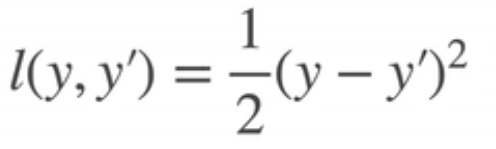
L1 LOSS - 绝对值损失函数:隔得多远，不一样的时候都更新一样的梯度(常数)，稳定，但零点不可导，末期不稳定
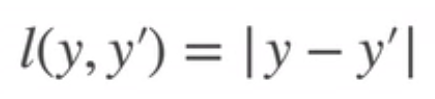
Huber's Robust Loss - 取以上两个的优点，差得远就是L1模式，近了就L2模式
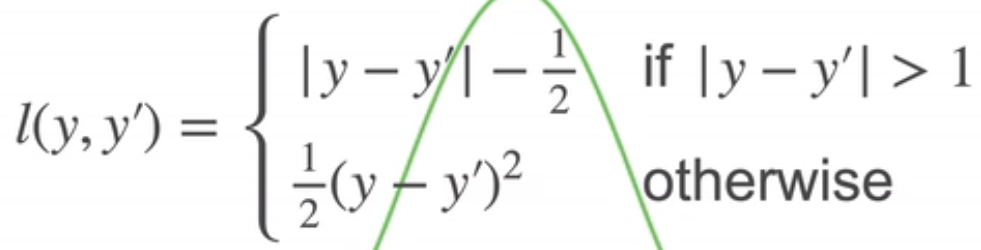

#### Mnist数据集
Fashion-MNIST版本

In [52]:
%matplotlib inline
import torch
import torchvision # 视觉库
from torch.utils import data
from torchvision import transforms # 对数据进行操作

In [57]:
# 通过框架内置函数将Fashion-MNIST下载读入
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式
# 并除以255使得所有像素的数值归一化
trans = transforms.ToTensor() # 用自带库transforms.totensor将图片转换为tensor
mnist_train = torchvision.datasets.FashionMNIST(root="../data",train=True, # 上一级目录的data文件夹
                                               transform=trans,download=True)# train=true代表下载的是训练数据集
mnist_test = torchvision.datasets.FashionMNIST(root="../data",train=False,
                                              transform=trans,download=True)# transform参数指定了后直接拿到tensor
len(mnist_train),len(mnist_test)

Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw


Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw
Processing...
Done!


D:\Anaconda\envs\Deep\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


(60000, 10000)

In [58]:
mnist_train[0][0].shape # 黑白图片故只有一个rgb通道，长和宽为28

torch.Size([1, 28, 28])

In [61]:
# 可视化数据集的函数
import matplotlib.pyplot as plt
def get_fashion_mnist_labels(labels):
    '''返回fashion-MNIST数据集的文本标签'''
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs,num_rows,num_cols,titles=None,scale=1.5):
    '''Plot a list of images'''
    figsize = (num_cols*scale, num_rows*scale)
    _, axes = plt.subplots(num_rows,num_cols,figsize=figsize)
    axes = axes.flatten()
    for i,(ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)

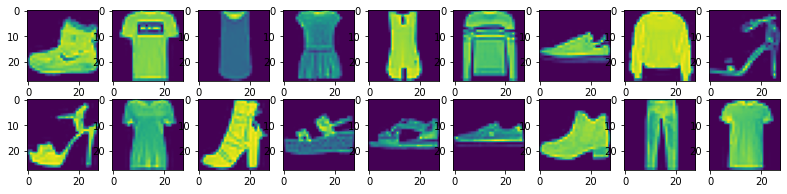

In [65]:
# 几个样本的图像及其相应的标签
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))# Dataloader就是一个iterator
show_images(X.reshape(18, 28, 28), 2, 9, titles = get_fashion_mnist_labels(y))

In [76]:
# 读取一个小批量的数据，大小为batch_size
batch_size = 256
def get_dataloader_workers():
    '''找到自己cpu有多少个核，并且使用与核数相等的进程数来读取数据'''
    import psutil
    cpu_nums = int(psutil.cpu_count())
    return cpu_nums

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, # train需要shuffle
                            num_workers = get_dataloader_workers())
from time import time
st = time()
for X, y in train_iter:
    continue # 测试每个batch读取IO要多久，因为经常就是读取的速度跟不上训练速度，可以优化
et = time() - st
f'{et} sec' # 怎么benchmark一下我们的数据读取

'7.211484670639038 sec'

In [80]:
# 把前面几个整合到一个函数里面，方便复用，resize可以把图片变大变小
def load_data_fashionMnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root = './data',train=True,
                                                   transform=trans,download=False)
    mnist_test = torchvision.datasets.FashionMNIST(root = './data',train=False,
                                                   transform=trans,download=False)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
           data.DataLoader(mnist_test, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()))

#### Softmax回归

实质为一个分类

    回归估计一个连续值，分类预测一个离散类别
    softmax即为一个operator，用exp(i)/exp(1)+...exp(n)得到概率，即预测置信度
    使用交叉熵来做loss

##### softmax从零开始实现，知道softmax的细节

In [99]:
from d2l import torch as d2l

In [81]:
import torch
from IPython import display
batch_size = 256# 我们每次随机读256张图片
train_iter, test_iter = load_data_fashionMnist(batch_size)

In [120]:
# softmax的输入需要是一个向量，所以我们将图片展平拉长，将它们视为784的向量，有10个类别所以网络输出维度为10
num_inputs = 784
num_outputs = 10
# 初始化参数，权重W的size形状设为这么多，就是每个样本元素都给一个参数
W = torch.normal(0, 0.01, size=(num_inputs, num_outputs),requires_grad=True) # 权重W初始为高分布斯
b = torch.zeros(num_outputs, requires_grad=True)

In [84]:
# 回顾 : 给定一个矩阵X，我们可以对所有元素也可以按照轴来求和
X = torch.tensor([[1.0, 2.0, 3.0],[4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

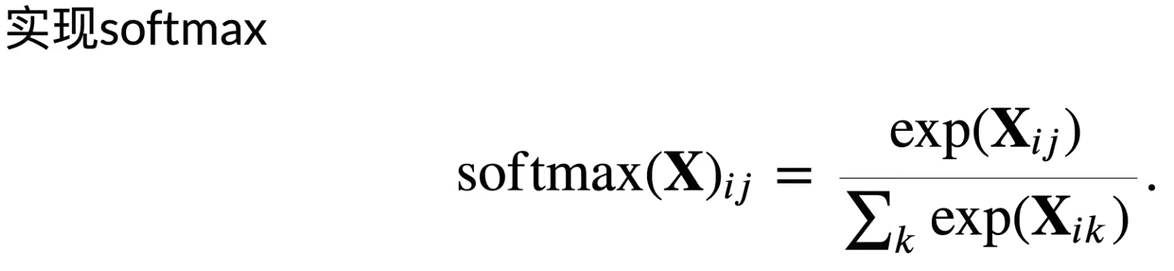

In [87]:
def softmax(X): # 对于矩阵来说就是对每一行给它做softmax
    X_exp = torch.exp(X) # 先对每个元素做指数运算
    partition = X_exp.sum(1, keepdim=True) # 维度为1即对每一行进行求和
    return X_exp / partition # 这里应用了广播机制，对第i行每个元素除以partition的第i个元素

In [89]:
# 验证:我们将每个元素变成要给非负数。此外，依据概率原理，每行总和为1
X = torch.normal(0, 1, (2, 5))# 随机创建一个均值0方差1的2行5列矩阵
print(X)
X_prob = softmax(X) # 放进softmax,首先所有变正了
X_prob, X_prob.sum(1) # 每行的总和是1，实现概率的前提

tensor([[-0.9771, -0.1000,  1.1300,  1.2173,  0.3801],
        [-0.3432,  2.3900,  0.1445,  1.7808,  0.1954]])


(tensor([[0.0408, 0.0982, 0.3358, 0.3665, 0.1587],
         [0.0356, 0.5476, 0.0580, 0.2978, 0.0610]]),
 tensor([1., 1.]))

In [90]:
# 实现softmax回归模型
def net(X):
    return softmax(torch.matmul(X.reshape((-1,W.shape[0])), W)+ b)# -1代表自动计算，应当等于batch_siez
# W.shape[0]=784，X就会被reshape成一个256*784的矩阵,再对X和 W做矩阵乘法，通过广播再加上bias

In [92]:
# 回顾 : 创建一个数据y_hat,其中包含2个样本在3个类别的预测概率，使用y作为y_hat中概率的索引
y = torch.tensor([0, 2]) # 真实的标号
y_hat = torch.tensor([[0.1, 0.3, 0.6],[0.3, 0.2, 0.5]])
y_hat[[0, 1], y] # 对0样本，拿出y[0]对应元素，对1样本，拿出y[1]对应元素

tensor([0.1000, 0.5000])

In [94]:
# 实现交叉熵损失函数
def cross_entropy(y_hat, y):# y_hat为预测，y为真实值
    return -torch.log(y_hat[range(len(y_hat)), y]) # 如上拿出这些值，求log的负数
cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [95]:
# 将预测类别与真实y元素进行比较
def accuracy(y_hat, y):
    '''计算预测正确的数量'''
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1: # 如果y_hat是二维矩阵的话
        y_hat = y_hat.argmax(axis = 1)# axis=1即为按照每一行求argmax,即每一行最大元素的下标存入y_hat
    cmp = y_hat.type(y.dtype) == y # 将y_hat转成y的类型做比较，成布尔类型
    return float(cmp.type(y.dtype).sum()) #再把它转成和y一样的形状求和转成浮点数

accuracy(y_hat, y) / len(y) # 找出预测正确的样本数除y的长度

0.5

In [96]:
# 评估在任意模型net的准确率-给要给模型和数据迭代器，来计算模型在这个数据迭代器上的精度
def evaluate_accuracy(net, data_iter):
    '''计算在指定数据集上模型的精度'''
    if isinstance(net, torch.nn.Module): # 如果是nn的类型
        net.eval() # 将模型设为评估模式，不要计算梯度了，只做一个forward pass
    metric = Accumulator(2) # 正确预测数、预测总数
    for X, y in data_iter: # 每次拿到要给batch的X和y
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1] # 分类正确的样本数和总样本数，就是精度

In [98]:
# Accumulator实例中创建了2个变量，用于分别存储正确预测的数量和预测的总数量
class Accumulator:
    '''在n个变量上累加'''
    def __init__(self, n):
        self.data = [0.0] * n
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]
evaluate_accuracy(net, test_iter) # 这里是随机出来的模型和测试迭代器的测试精度

0.0672

In [110]:
# Softmax回归的训练脚本
def train_epoch_ch3(net, train_iter, loss, updater):
    """The training loop defined in Chapter 3."""
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accumulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # Using PyTorch in-built optimizer & loss criterion
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y),
                       y.size().numel())
        else:
            # Using custom built optimizer & loss criterion
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

In [116]:
# 辅助动画:定义一个在动画中绘制数据的实用程序类,实时看到训练过程的变化
class Animator:
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(5.5, 4.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [122]:
# 本章训练函数
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    """Train a model (defined in Chapter 3)."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)#训练
#         print("train_loss & train_acc :",train_metrics)
        test_acc = evaluate_accuracy(net, test_iter)#测试
#         print('test_acc:',test_acc)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [118]:
# 小批量随机梯度下降来优化模型的损失函数
lr = 0.1
def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size) # SGD优化

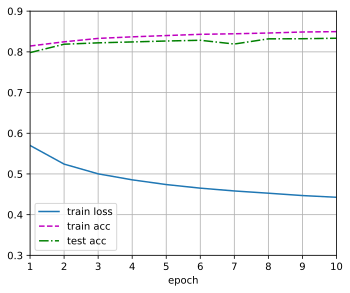

In [123]:
#训练模型10个迭代周期
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

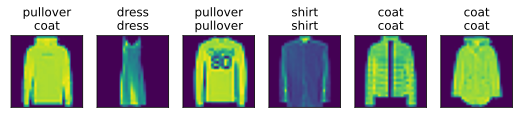

In [124]:
def predict_ch3(net, test_iter, n=6):
    """Predict labels (defined in Chapter 3)."""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(d2l.argmax(net(X), axis=1))# 拿到标号
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        d2l.reshape(X[0:n], (n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

##### softmax的torch简洁实现

通过深度学习框架的高级API能够实现softmax回归变得更加容易

In [126]:
import torch
from torch import nn
from d2l import torch as d2l
batch_size = 256
train_iter, test_iter = load_data_fashionMnist(batch_size)

In [127]:
# softmax回归的输出层是一个全连接层
# pytorch不会隐式的调整输入的形状
# 因此我们定义了展平层(flatten)在线性层前调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))# flatten把任何维度的tensor展成2d的tensor

def init_weights(m):#对每一层初始化参数
    if type(m) == nn.Linear:# 如果是linear layer的话
        nn.init.normal_(m.weight, std=0.01)# weight初始值默认为0，方差为1
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [128]:
# 损失和优化
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(),lr=0.1)

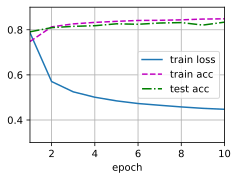

In [129]:
# 调用之前定义的训练函数来训练模型
num_epochs = 10
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

#### 感知机

单个感知机是二分类模型，求解算法等价于batch_size为1的梯度下降，但是只是线性分割面，所以不能拟合XOR函数，这也导致了AI第一次寒冬，后来发现解决办法就是多层感知机MLP
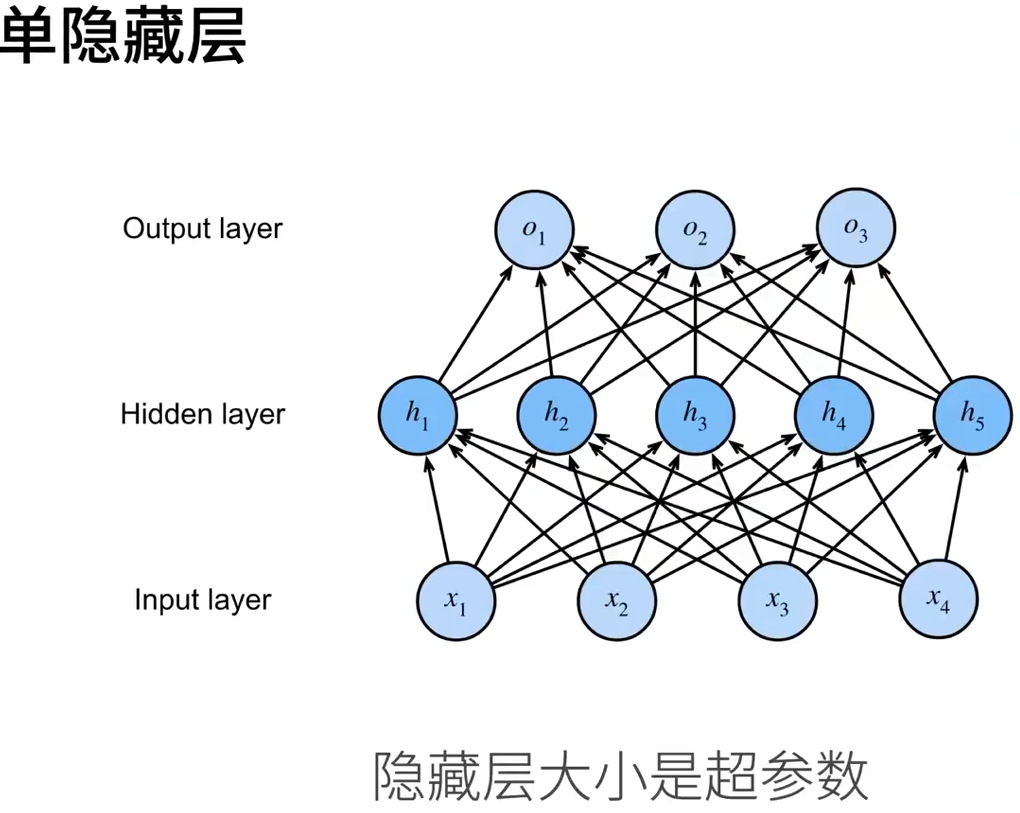
一定要加激活函数，要不然即使多层了仍然是最简单的线性模型，加了激活函数才有强大的非线性拟合能力

激活函数：

    sigmoid:1/[1+exp(-x)] - 就是一个软的 1 if x>0 | 0 others
    tanh:[1-exp(-2x)/[1+exp(-2x) - 将sigmoid输入投影到-1,1
    RELU:Rectified linear unit - max(x,0) - 不用求exp，速度很快，算一次exp都是很贵的，一次exp等价一百次乘法运算的成本，GPU稍微好一点，但是还是没有max算起来快
    
多类分类:
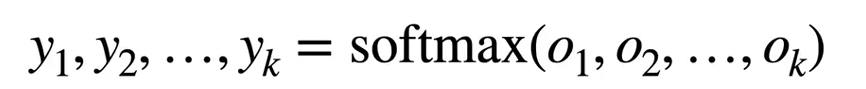
MLP就是比softmax回归多了一层的隐藏层，如果去掉隐藏层，MLP就变成softmax，加上隐藏层，softmax就变成MLP。MLP的超参是隐藏层的层数和每层的神经元个数，一般都是可以做一个从胖到窄的，慢慢压缩信息，机器学习本质就是做压缩，但是一次缩的太快会损失很多信息，要慢慢缩最好

##### MLP的从零开始实现

In [130]:
import torch
from torch import nn
from d2l import torch as d2l
batch_size = 256
train_iter, test_iter = load_data_fashionMnist(batch_size)

In [143]:
# 实现一个具有单隐藏层的多层感知机，它包含256个隐藏单元
num_inputs, num_outputs, num_hiddens = 784, 10, 256
# MLP
W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True))
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True))
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]# 两层，一层hidden一层output

In [134]:
# 实现激活函数
def relu(X):
    a = torch.zeros_like(X)# 数据类型和形状都一样但是值是0的矩阵
    return torch.max(X, a)

In [137]:
# 实现MLP模型
def net(X):
    X = X.reshape((-1, num_inputs))# -1这里会变成batch_size，numinputs=784即为拉成一个矩阵
    H = relu(X @ W1 + b1) # @为矩阵乘法
    return (H @ W2 + b2)
loss = nn.CrossEntropyLoss()

AssertionError: 0.6907015942573548

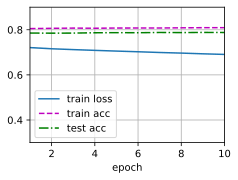

In [139]:
# 训练
num_epochs=10
lr = 0.01
updater = torch.optim.SGD(params, lr = lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

##### MLP的torch简洁实现

In [140]:
import torch
from torch import nn
from d2l import torch as d2l

In [141]:
# 隐藏层包含256个隐藏单元，并使用了ReLu
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256),nn.ReLU(),
                    nn.Linear(256,10))# flatten把任何维度的tensor展成2d的tensor

def init_weights(m):#对每一层初始化参数
    if type(m) == nn.Linear:# 如果是linear layer的话
        nn.init.normal_(m.weight, std=0.01)# weight初始值默认为0，方差为1
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

AssertionError: 2.3036517552693683

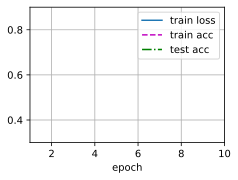

In [144]:
# 训练过程
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(),lr = lr)

train_iter, test_iter = load_data_fashionMnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

#### 过拟合和欠拟合实验

通过多项式拟合来交互地探索这些概念

In [11]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

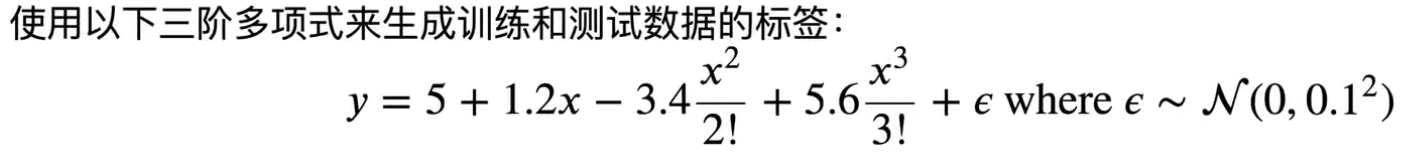

In [12]:
max_degree = 20
n_train, n_test = 100, 100
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i+1)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [13]:
# 看一下前两个样本
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [
    torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]
features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.8814],
         [-0.1502]]),
 tensor([[ 1.0000e+00, -8.8135e-01,  3.8839e-01, -1.1410e-01,  2.5141e-02,
          -4.4317e-03,  6.5098e-04, -8.1963e-05,  9.0298e-06, -8.8428e-07,
           7.7936e-08, -6.2445e-09,  4.5863e-10, -3.1094e-11,  1.9575e-12,
          -1.1501e-13,  6.3355e-15, -3.2846e-16,  1.6083e-17, -7.4603e-19],
         [ 1.0000e+00, -1.5018e-01,  1.1277e-02, -5.6453e-04,  2.1195e-05,
          -6.3663e-07,  1.5935e-08, -3.4187e-10,  6.4178e-12, -1.0709e-13,
           1.6083e-15, -2.1958e-17,  2.7480e-19, -3.1746e-21,  3.4055e-23,
          -3.4096e-25,  3.2003e-27, -2.8272e-29,  2.3588e-31, -1.8645e-33]]),
 tensor([2.0365, 4.7027]))

In [14]:
# 实现一个函数来评估模型在给定数据集上的损失
def evaluate_loss(net, data_iter, loss):  
    """评估给定数据集上模型的损失。"""
    metric = d2l.Accumulator(2)  # 损失的总和, 样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [15]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式特征中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(
                net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
#     print('weight:', net[0].weight.data.numpy())

三阶多项式函数拟合(正态)

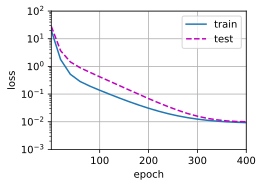

In [16]:
# 从多项式特征中选择前4个维度，即 1, x, x^2/2!, x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

线性函数拟合(欠拟合)

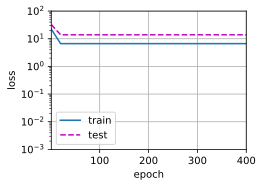

In [17]:
# 从多项式特征中选择前2个维度，即 1, x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

高阶多项式函数拟合(过拟合)

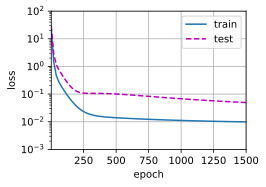

In [18]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

In [19]:
#TODO : weight_decay

## 基本数据操作

### 创建tensor常用函数:
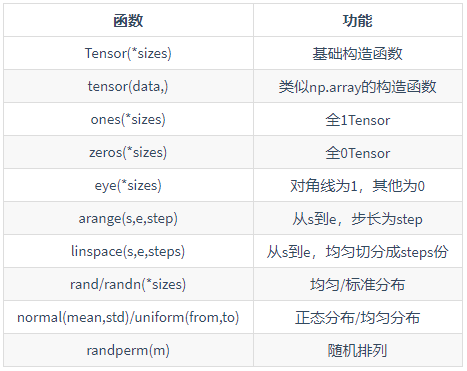

In [31]:
x = torch.rand(3, 3) # 随机tensor ,empty为空tensor
print(x,'\n')

# 加法 : 通过shape或者size()来获取Tensor的形状
print(x.size())
print(x.shape,'\n')

# tensor加法1
y = torch.rand(3, 3)
print(x + y,'\n')
#２
print(torch.add(x, y))
# 3
result = torch.empty(3, 3)
torch.add(x, y, out=result)
print(result,'\n')
# adds x to y
y.add_(x)
print(y,'\n')

# 索引:出来的结果与原数据共享内存，也即修改一个，另一个会跟着修改。
y = x[0, :]
y += 1
print(y)
print(x) # 源tensor也被改了

tensor([[0.3587, 0.8772, 0.1285],
        [0.4830, 0.0250, 0.6706],
        [0.9494, 0.8177, 0.5896]]) 

torch.Size([3, 3])
torch.Size([3, 3]) 

tensor([[0.6636, 1.3363, 1.0571],
        [0.4841, 0.6035, 1.5979],
        [1.4853, 1.6396, 0.6966]]) 

tensor([[0.6636, 1.3363, 1.0571],
        [0.4841, 0.6035, 1.5979],
        [1.4853, 1.6396, 0.6966]])
tensor([[0.6636, 1.3363, 1.0571],
        [0.4841, 0.6035, 1.5979],
        [1.4853, 1.6396, 0.6966]]) 

tensor([[0.6636, 1.3363, 1.0571],
        [0.4841, 0.6035, 1.5979],
        [1.4853, 1.6396, 0.6966]]) 

tensor([1.3587, 1.8772, 1.1285])
tensor([[1.3587, 1.8772, 1.1285],
        [0.4830, 0.0250, 0.6706],
        [0.9494, 0.8177, 0.5896]])


索引: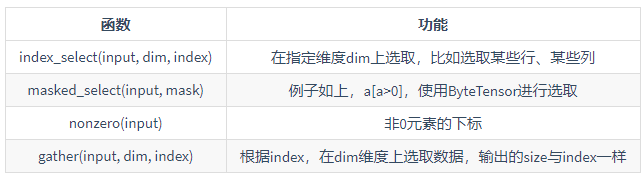

In [32]:
# 改变形状 view()
x = torch.rand(5,3)
print(x)
y = x.view(-1) # -1为自动计算铺成向量需要多少维度
print(y)
z = x.view(-1,5)
print(z,'\n')

# view()返回的新Tensor与源Tensor虽然可能有不同的size，但是是共享data的，也即更改其中的一个，另外一个也会跟着改变。
# 顾名思义，view仅仅是改变了对这个张量的观察角度，内部数据并未改变

# 如果我们想返回一个真正新的副本（即不共享data内存）该怎么办,Pytorch还提供了一个reshape()可以改变形状,但是此函数并不能保证返回的是其拷贝，所以不推荐使用。推
# 荐先用clone创造一个副本然后再使用view
x_cp = x.clone().view(15) # 重点 使用clone还有一个好处是会被记录在计算图中，即梯度回传到副本时也会传到源Tensor。
x -= 1
print(x)
print(x_cp)

tensor([[0.0846, 0.4801, 0.4154],
        [0.1506, 0.4573, 0.6188],
        [0.1475, 0.4259, 0.0911],
        [0.5427, 0.5098, 0.4819],
        [0.1962, 0.0146, 0.1123]])
tensor([0.0846, 0.4801, 0.4154, 0.1506, 0.4573, 0.6188, 0.1475, 0.4259, 0.0911,
        0.5427, 0.5098, 0.4819, 0.1962, 0.0146, 0.1123])
tensor([[0.0846, 0.4801, 0.4154, 0.1506, 0.4573],
        [0.6188, 0.1475, 0.4259, 0.0911, 0.5427],
        [0.5098, 0.4819, 0.1962, 0.0146, 0.1123]]) 

tensor([[-0.9154, -0.5199, -0.5846],
        [-0.8494, -0.5427, -0.3812],
        [-0.8525, -0.5741, -0.9089],
        [-0.4573, -0.4902, -0.5181],
        [-0.8038, -0.9854, -0.8877]])
tensor([0.0846, 0.4801, 0.4154, 0.1506, 0.4573, 0.6188, 0.1475, 0.4259, 0.0911,
        0.5427, 0.5098, 0.4819, 0.1962, 0.0146, 0.1123])


In [33]:
# 常用的函数就是item(), 它可以将一个标量Tensor转换成一个Python number：
x = torch.randn(1) # only one element tensors can be converted to Python scalars
print(x)
print(x.item())

tensor([-0.8058])
-0.8058483600616455


### 内置的线性代数函数:PyTorch中的Tensor支持超过一百种操作，包括转置、索引、切片、数学运算、线性代数、随机数等等，可参考官方文档。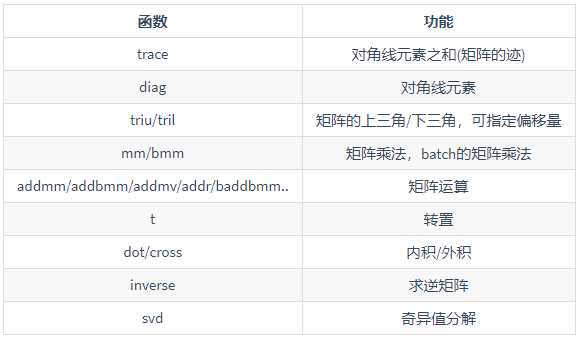

### 广播机制 : 

In [33]:
# 前面我们看到如何对两个形状相同的Tensor做按元素运算。当对两个形状不同的Tensor按元素运算时，
# 可能会触发广播（broadcasting）机制：先适当复制元素使这两个Tensor形状相同后再按元素运算.
x = torch.arange(1, 3).view(1, 2)
print(x)
y = torch.arange(1, 4).view(3, 1)
print(y)
print(x + y)
# 由于x和y分别是1行2列和3行1列的矩阵，如果要计算x + y，那么x中第一行的2个元素被广播（复制）到了第二行和第三行，
# 而y中第一列的3个元素被广播（复制）到了第二列。如此，就可以对2个3行2列的矩阵按元素相加。

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


### 运算的内存开销 :

In [36]:
# 索引操作是不会开辟新内存的，而像y = x + y这样的运算是会新开内存的，然后将y指向新内存。
# 为了演示这一点，我们可以使用Python自带的id函数：如果两个实例的ID一致，那么它们所对应的内存地址相同；反之则不同。
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
y = y + x
print(id(y) == id_before) # False 

# 如果想指定结果到原来的y的内存，我们可以使用前面介绍的索引来进行替换操作。
# 在下面的例子中，我们把x + y的结果通过[:]写进y对应的内存中。
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
y[:] = y + x
print(id(y) == id_before) # True

# 我们还可以使用运算符全名函数中的out参数或者自加运算符+=(也即add_())达到上述效果，
# 例如torch.add(x, y, out=y)和y += x(y.add_(x))。
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
torch.add(x, y, out=y) # y += x, y.add_(x)
print(id(y) == id_before) # True

False
True
True


### Tensor和NumPy相互转换

In [ ]:
# Tensor转NumPy : numpy()将Tensor转换成NumPy数组
a = torch.ones(5)
b = a.numpy()
print(a, b)

# NumPy数组转Tensor : from_numpy()将NumPy数组转换成Tensor
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a, b)
# 这两个函数所产生的的Tensor和NumPy中的数组共享相同的内存（所以他们之间的转换很快），改变其中一个时另一个也会改变

# 有一个常用的方法就是直接用torch.tensor()将NumPy数组转换成Tensor，需要注意的是该方法总是会进行数据拷贝，
# 返回的Tensor和原来的数据不再共享内存
c = torch.tensor(a)
a += 1
print(a, c)

### Tensor on GPU : 用方法to()可以将Tensor在CPU和GPU（需要硬件支持）之间相互移动。

In [34]:
# 以下代码只有在PyTorch GPU版本上才会执行
if torch.cuda.is_available():
    device = torch.device("cuda")          # GPU
    y = torch.ones_like(x, device=device)  # 直接创建一个在GPU上的Tensor
    x = x.to(device)                       # 等价于 .to("cuda")
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # to()还可以同时更改数据类型

## autograd

In [38]:
# 创建一个Tensor并设置requires_grad=True
x = torch.ones(2, 2, requires_grad=True)
print(x)
print(x.grad_fn) # x是直接创建的，所以它没有grad_fn, x这种直接创建的称为叶子节点，叶子节点对应的grad_fn是None。

# 运算操作
y = x + 2
print(y)
print(y.grad_fn) #  而y是通过一个加法操作创建的，所以它有一个为<AddBackward>的grad_fn。

z = y * y * 3
out = z.mean()
print(z, out)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [39]:
#因为out是一个标量，所以调用backward()时不需要指定求导变量：
out.backward() # 等价于 out.backward(torch.tensor(1.))
#我们来看看out关于x的梯度 d(out)/dx
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


## 线性回归Linear regression

### 矢量计算表达式 

在模型训练或预测时，我们常常会同时处理多个数据样本并用到矢量计算。在介绍线性回归的矢量计算表达式之前，让我们先考虑对两个向量相加的两种方法

In [43]:
# 先定义两个1000维的向量
from time import time
a = torch.ones(1000)
b = torch.ones(1000)

# 向量相加的一种方法是，将这两个向量按元素逐一做标量加法。
start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)

#向量相加的另一种方法是，将这两个向量直接做矢量加法。
start = time()
d = a + b
print(time() - start)

#结果很明显，后者比前者更省时。因此，我们应该尽可能采用矢量计算，以提升计算效率。

0.019001245498657227
0.0


### 线性回归的从零开始实现

In [1]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [3]:
# 1.生成数据集
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)
print(features[0], labels[0])

tensor([-0.2100,  1.4248]) tensor(-1.0544)


# tensorflow

## tf与keras联合的例子

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__)
print(tf.keras.__version__)

2.4.1
2.4.0


In [4]:
# 定义模型:最常见的模型类型是层的堆叠：tf.keras.Sequential 模型
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

tf.keras.layers中网络配置：

activation：设置层的激活函数。此参数由内置函数的名称指定，或指定为可调用对象。默认情况下，系统不会应用任何激活函数。

kernel_initializer 和 bias_initializer：创建层权重（核和偏差）的初始化方案。此参数是一个名称或可调用对象，默认为 "Glorot uniform" 初始化器。

kernel_regularizer 和 bias_regularizer：应用层权重（核和偏差）的正则化方案，例如 L1 或 L2 正则化。默认情况下，系统不会应用正则化函数。

In [7]:
# 定义网络配置
layers.Dense(32, activation='sigmoid')
layers.Dense(32, activation=tf.sigmoid)
layers.Dense(32, kernel_initializer='orthogonal')
layers.Dense(32, kernel_initializer=tf.keras.initializers.glorot_normal)
layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.01))
layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l1(0.01))

In [8]:
# 定义训练流程
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=[tf.keras.metrics.categorical_accuracy])

In [9]:
# 输入随机数据
import numpy as np

train_x = np.random.random((1000, 72))
train_y = np.random.random((1000, 10))

val_x = np.random.random((200, 72))
val_y = np.random.random((200, 10))

model.fit(train_x, train_y, epochs=10, batch_size=100,
          validation_data=(val_x, val_y))

Epoch 1/10
10/10 [==============================] - 1s 13ms/step - loss: 11.6436 - categorical_accuracy: 0.0946 - val_loss: 11.8818 - val_categorical_accuracy: 0.1100
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 11.7165 - categorical_accuracy: 0.0994 - val_loss: 12.3005 - val_categorical_accuracy: 0.1200
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 12.3261 - categorical_accuracy: 0.1033 - val_loss: 13.4790 - val_categorical_accuracy: 0.1250
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 13.8309 - categorical_accuracy: 0.1078 - val_loss: 15.9812 - val_categorical_accuracy: 0.1350
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 16.5304 - categorical_accuracy: 0.0881 - val_loss: 20.0478 - val_categorical_accuracy: 0.1300
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 20.8052 - categorical_accuracy: 0.0922 - val_loss: 24.3874 - val_categorical_accuracy: 0.1300
Epo

In [10]:
dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))
dataset = dataset.batch(32)
dataset = dataset.repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((val_x, val_y))
val_dataset = val_dataset.batch(32)
val_dataset = val_dataset.repeat()

model.fit(dataset, epochs=10, steps_per_epoch=30,
          validation_data=val_dataset, validation_steps=3)

Epoch 1/10
30/30 [==============================] - 0s 3ms/step - loss: 56.5547 - categorical_accuracy: 0.0896 - val_loss: 71.8745 - val_categorical_accuracy: 0.1250
Epoch 2/10
30/30 [==============================] - 0s 1ms/step - loss: 88.1089 - categorical_accuracy: 0.0887 - val_loss: 109.9744 - val_categorical_accuracy: 0.1354
Epoch 3/10
30/30 [==============================] - 0s 1ms/step - loss: 131.6498 - categorical_accuracy: 0.0929 - val_loss: 159.9969 - val_categorical_accuracy: 0.1146
Epoch 4/10
30/30 [==============================] - 0s 1ms/step - loss: 185.8225 - categorical_accuracy: 0.0865 - val_loss: 223.1514 - val_categorical_accuracy: 0.1562
Epoch 5/10
30/30 [==============================] - 0s 1ms/step - loss: 252.4593 - categorical_accuracy: 0.0897 - val_loss: 294.2376 - val_categorical_accuracy: 0.1250
Epoch 6/10
30/30 [==============================] - 0s 1ms/step - loss: 325.6284 - categorical_accuracy: 0.1122 - val_loss: 369.7544 - val_categorical_accuracy: 0.

In [11]:
test_x = np.random.random((1000, 72))
test_y = np.random.random((1000, 10))
model.evaluate(test_x, test_y, batch_size=32)
test_data = tf.data.Dataset.from_tensor_slices((test_x, test_y))
test_data = test_data.batch(32).repeat()
model.evaluate(test_data, steps=30)
# predict
result = model.predict(test_x, batch_size=32)
print(result)

30/30 [==============================] - 0s 655us/step - loss: 681.5824 - categorical_accuracy: 0.0969
[[9.2274018e-29 2.7944267e-01 1.5133801e-01 ... 0.0000000e+00
  1.1262973e-01 3.0674075e-21]
 [3.2385137e-32 3.5925537e-01 1.1841202e-01 ... 0.0000000e+00
  1.6895610e-01 1.2892940e-23]
 [2.1092583e-27 3.4842908e-01 7.5426698e-02 ... 0.0000000e+00
  1.7830808e-01 2.6022218e-20]
 ...
 [3.4721602e-26 3.4495890e-01 1.3475844e-01 ... 0.0000000e+00
  1.4699490e-01 1.7198010e-19]
 [3.3191037e-29 2.8259248e-01 1.1785960e-01 ... 0.0000000e+00
  1.6483472e-01 1.2041241e-21]
 [3.4608781e-32 4.4340533e-01 4.5186251e-02 ... 0.0000000e+00
  1.4486931e-01 1.1212542e-23]]


## NLP从入门到精通 - https://www.bilibili.com/video/BV17K4y1W7yb
Google-tensorflow

### NLP入门与文本分类

In [1]:
# Tokenization
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

sentence = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words=100) # Tokenizer object,num_words表示要保留的最大单词数,比如只想要语料库中出现最频繁的100个单词
tokenizer.fit_on_texts(sentence) # 每个词的index分配过程，使得分词器查看所有的文本，将数字对应匹配
word_index = tokenizer.word_index # 完整的单词列表通过分词器word_index属性获得

sequences = tokenizer.texts_to_sequences(sentence) #创建了代表每个句子的token序列

print(word_index) # token的单词/数字对
print(sequences) # text_to_sequences返回的序列 类似句向量

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


In [3]:
# 若不在训练集中出现的单词，则会自动缺省
test_data = [
    'i really love my dog', # really 不存在训练集中
    'my dog loves my manatee' # loves manatee不存在于训练集
]

test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq) # 不存在的则自动忽略

[[4, 2, 1, 3], [1, 3, 1]]


In [9]:
# 对付测试集里不认识的词
from tensorflow.keras.preprocessing.text import Tokenizer

sentence = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")
#使用oov_token属性,将其设置为1,代替语料库中无法识别的内容
tokenizer.fit_on_texts(sentence) 
word_index = tokenizer.word_index 
sequences = tokenizer.texts_to_sequences(sentence) 
print(word_index)
print(sentence)

test_data = [
    'i really love my dog', # really 不存在训练集中
    'my dog loves my manatee' # loves manatee不存在于训练集
]

test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq) 

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
['I love my dog', 'I love my cat', 'You love my dog!', 'Do you think my dog is amazing?']
[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


In [11]:
# 用padding解决不同长度的句子,padding即为填充
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 用pad_sequences来填充序列
sentence = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")
#使用oov_token属性,将其设置为代替语料库中无法识别的内容
tokenizer.fit_on_texts(sentence)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences) # 用0来填充到出现的最大的句长度
print(word_index)
print(sentence)
print("padded sequences : \n",padded) # 填充后的序列

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
['I love my dog', 'I love my cat', 'You love my dog!', 'Do you think my dog is amazing?']
padded sequences : 
 [[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


In [12]:
padded = pad_sequences(sequences,padding='post') #希望往句子后填充0
print("padded sequences : \n",padded) # 填充后的序列

padded sequences : 
 [[ 5  3  2  4  0  0  0]
 [ 5  3  2  7  0  0  0]
 [ 6  3  2  4  0  0  0]
 [ 8  6  9  2  4 10 11]]


In [13]:
padded = pad_sequences(sequences,padding='post',
                      truncating='post',maxlen=5) #设置最大长度和长于则尾部截断
print("padded sequences : \n",padded) # 填充后的序列

padded sequences : 
 [[5 3 2 4 0]
 [5 3 2 7 0]
 [6 3 2 4 0]
 [8 6 9 2 4]]


In [15]:
# 处理 新闻标题是否讽刺 的二分类情感分析数据集
import json
text = []
labels = []
urls = []
with open('./Sarcasm_Headlines_Dataset_v2.json','r',encoding='utf-8')as f:
    whole = f.readlines()
    for line in whole:
        data = json.loads(line) # 此时data是一个list
        text.append(data['headline'])
        labels.append(data['is_sarcastic'])
        urls.append(data['article_link'])

In [19]:
print(labels[1],text[1],urls[1])

0 dem rep. totally nails why congress is falling short on gender, racial equality https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207


In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(text)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(text)
padded = pad_sequences(sequences,padding='post')
print(padded[0])
print(padded.shape) # 一共28619个序列，每个序列152个Token

[16004   355  3167  7474  2644     3   661  1119     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
(28619, 152)


In [22]:
# 利用切片来分开训练集和测试集
train_size = 20000
#
train_text = text[0:train_size]
test_text = text[train_size:]
train_label = labels[0:train_size]
test_label = labels[train_size:]
print(train_text[0],train_label[0],'\n',test_text[0],test_label[0])

thirtysomething scientists unveil doomsday clock of hair loss 1 
 i wrote speeches for vice president biden. here's what it felt like. 0


In [25]:
# 还是必须确保神经网络只见过训练数据 所以tokenize的时候也要分开
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(train_text)

word_index = tokenizer.word_index

# 把句子变成数字，数字代表单词的token
train_seq = tokenizer.texts_to_sequences(train_text)
train_padded = pad_sequences(train_seq)
print(train_seq[0],train_padded[0])
test_seq = tokenizer.texts_to_sequences(test_text)
test_padded = pad_sequences(test_seq)
print(test_seq[0],test_padded[0])

[12941, 325, 3169, 5817, 2489, 3, 655, 993] [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
 12941   325  3169  5817  2489     3   655   993]
[83, 4338, 14142, 6, 2186, 137

这种采用句向量进行文本分类的方式，单词在句子中出现的顺序并不重要，决定类别的是将各个单词相加后得出的权重，向量方向大致代表了类别色彩

In [31]:
# 得到token，下一步就是embedding
import tensorflow as tf
from tensorflow import keras
model = tf.keras.Sequential([
    # 在embedding层每个单词在epoch中学习自己的词向量方向
    tf.keras.layers.Embedding(input_dim =152,output_dim=152),
    # 借助GlobalAveragePooling参数进行池化，即把向量相加
    tf.keras.layers.GlobalAveragePooling1D(),
    # 然后将结果塞进一个普通的NN里面
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [33]:
num_epochs = 30
# 训练就和model.fit一样简单
history = model.fit(train_padded,train_label,epochs=num_epochs,
                   validation_data=(test_padded,test_label),verbose=2)

In [ ]:
# 如何利用该神经网络，判断新句子的情感色彩
sentence = [
    "granny starting to fear spiders in the garden might be real",
    "the weather today is bright and sunny"
]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences)
print(model.predict(padded))

### 文本生成

RNN原理：如果要生成文本，单词顺序就很重要了，首先使用RNN，RNN的原理和斐波那契数列很相似，1+2=3，然后再用3+2=5，再用5+3=8，这样下来其实每个数字本质上都和之前的数字有关，3=2+1,5=3+2+1,1虽然出现的早但是始终存在。这样一来，一个数值可以在整个数列的生命中反复出现

每个当前神经元学一点东西然后输出并且出一个前馈结果，传递到下一个神经元，如果传输距离很长，上下文之间的联系可能会被大大稀释
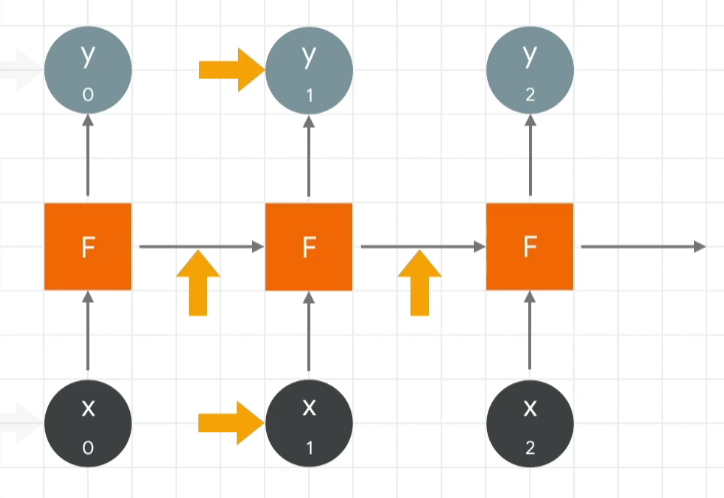
随着计算的传递，早期输入的影响就会越来越小，比如1号位置的数字对100号位置的数字影响很小，二关键描述词越接近预测文本，预测越准确，所以RNN的缺点就是超短期的记忆，而LSTM超越了这个，形成了长短期记忆

LSTM原理：
如I love in Ireland so at school they made me learn how to speak 【Irish】.
判断的依据是因为前文提到了Ireland，但是这个单词在句中的位置非常靠前，用RNN的话很难实现正确预测
LSTM引入了一种叫做Cell state的概念，可以跨越多个时间段保持语境，从而将句子的开头句意带入下文，更神器的是它也可以是双向的，句子后面的词也可以为前面的词提供语境，这样我们就可以更准确地学习句子语义了

In [ ]:
# 使用LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer,vocab_size=128, 64),
    # 定义一个LSTM层，里面的参数表示其中隐藏节点的数量，这也表示该LSTM输出门的维度
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    # 希望它是双向的则用Bidirectional来包裹这个层，这将同时向前和向后巡视句子文本
    # 学习每个句子的最佳参数然后将其合并
    tf.keras.layers.Dense(64,activation='relu'),
    # Dense就是普通的全连接层
    tf.keras.layers.Dense(1,activateion='sigmoid')
])

LSTM参数：
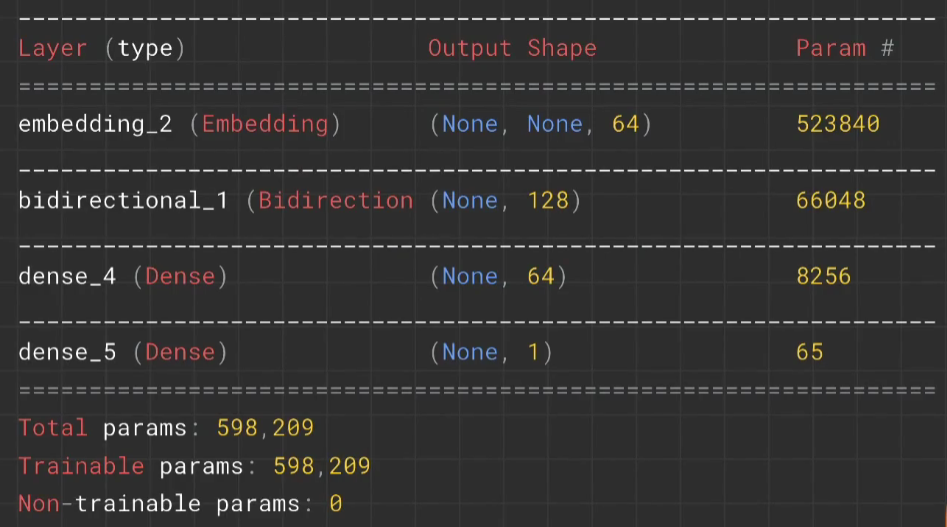

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer,vocab_size=128, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64，return_sequences=True)),
    # 只需要设return_seq=true,也可以将LSTM层堆叠起来，这样上一层的输出就会传递到下一层，和密集层(Dense layer)很像
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activateion='sigmoid')
])

#### 打造会写诗的AI

In [37]:
data = '''Shall I compare thee to a summer's day?
Thou art more lovely and more temperate.
Rough winds do shake the darling buds of May,
And summer's lease hath all too short a date.
Sometime too hot the eye of heaven shines,
And often is his gold complexion dimmed;
And every fair from fair sometime declines,
By chance or nature's changing course untrimmed.
But thy eternal summer shall not fade,
Nor lose possession of that fair thou ow'st,
Nor shall Death brag thou wand'rest in his shade,
When in eternal lines to time thou grow'st.
    So long as men can breathe or eyes can see,
    So long lives this, and this gives life to thee.'''

In [40]:
tokenizer = Tokenizer()
corpus = data.lower().split("\n")
print(corpus)
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1 # 由于加个<OOV>token所以+1

["shall i compare thee to a summer's day?", 'thou art more lovely and more temperate.', 'rough winds do shake the darling buds of may,', "and summer's lease hath all too short a date.", 'sometime too hot the eye of heaven shines,', 'and often is his gold complexion dimmed;', 'and every fair from fair sometime declines,', "by chance or nature's changing course untrimmed.", 'but thy eternal summer shall not fade,', "nor lose possession of that fair thou ow'st,", "nor shall death brag thou wand'rest in his shade,", "when in eternal lines to time thou grow'st.", '    so long as men can breathe or eyes can see,', '    so long lives this, and this gives life to thee.']


In [57]:
# 分类的代码和生成的代码区别比较大
input_sequences = []
for line in corpus:
    # 为语料库的每行文本 创建token列表
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        # 生成n-grams
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [49]:
# N-gram :
# 例子：
line = [4, 2, 66, 8, 8, 67, 68, 69, 70]
two_grams = [4,2]
three_grams = [4,2,66]
four_grams = [4,2,66,8]
five_grams = [4,2,66,8,67]

In [58]:
import numpy as np
# 对句子进行填充
max_seq_len = max(len(x) for x in input_sequences)
# 对长度不够的句子填充0来补足
input_sequences = np.array(pad_sequences(input_sequences,maxlen = max_seq_len,padding ='pre'))
print(input_sequences.shape)
print(input_sequences[:10][:10])

(100, 10)
[[ 0  0  0  0  0  0  0  0  3 23]
 [ 0  0  0  0  0  0  0  3 23 24]
 [ 0  0  0  0  0  0  3 23 24  7]
 [ 0  0  0  0  0  3 23 24  7  4]
 [ 0  0  0  0  3 23 24  7  4  8]
 [ 0  0  0  3 23 24  7  4  8  9]
 [ 0  0  3 23 24  7  4  8  9 25]
 [ 0  0  0  0  0  0  0  0  2 26]
 [ 0  0  0  0  0  0  0  2 26 10]
 [ 0  0  0  0  0  0  2 26 10 27]]


此时就可以开始做了，生成问题非常特殊，就是把除了最后一个位置其他的位置当X，最后一个位置就当作label(Y)，比如看到一堆0和3，就预测label是23。

In [59]:
# 利用python超级简单的对列表进行分割
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
print(labels)

[23 24  7  4  8  9 25 26 10 27  1 10 28 30 31 32 11 33 34  5 35  9 36 37
 38 12 39  8 40 12 41 11 42  5 43 44 45 46 14 47 48 49 50  6 51  6 13 52
 54 15 55 56 57 58 60 16 61  3 62 63 64 65  5 66  6  2 67  3 68 69  2 70
 18 14 71 18 16 73  4 74  2 75 20 76 77 21 78 15 79 21 80 20 81 22  1 22
 82 83  4  7]


In [61]:
# 最后我们希望Y被分类且是独热(one-hot)编码
ys = tf.keras.utils.to_categorical(labels,num_classes=total_words)
print(ys)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


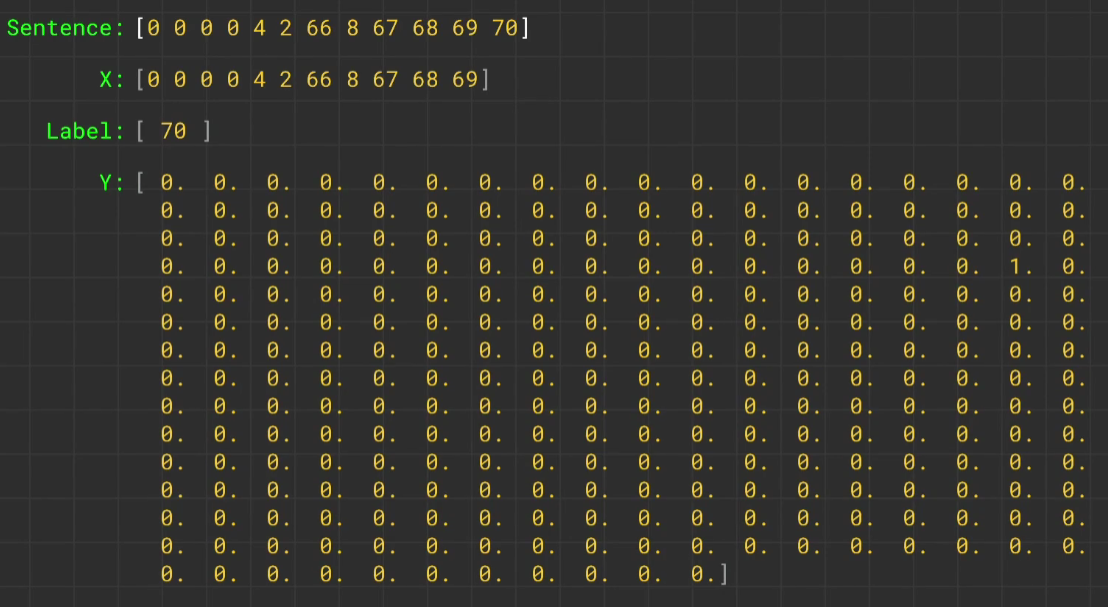

In [70]:
import tensorflow as tf
model = Sequential() # total_words代表语料库中的单词数
model.add(Embedding(total_words,240,input_length=max_seq_len-1))#单词众多，给与240个维度
model.add(Bidrectional(LSTM(150)))
model.add(Dense(total_words,cativation='softmax'))#输出一个包含总单词数目的密集向量
adam = Adam(lr = 0.01)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
history = model.fit(xs,ys,epoch=100,verbose=1)

In [ ]:
# 生成模型的检测方式
seed_text = 'I made a poetry machine'
next_words = 20
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_seq_len-1,padding='pre')
    predicted = model.predict_classes(token_list,verbose = 0)
    output_word = ""
    for word,index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " output_word output_word
print(seed_text)

# keras

In [4]:
# A Basci Example
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
data = np.random.random((1000,100))
labels = np.random.randint(2,size=(1000,1))
model = Sequential()
model.add(Dense(32,
               activation='relu',
               input_dim=100))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(data,labels,epochs=10,batch_size=32)
predictions = model.predict(data)

Epoch 1/10
32/32 [==============================] - 0s 839us/step - loss: 0.7004 - accuracy: 0.5313
Epoch 2/10
32/32 [==============================] - 0s 710us/step - loss: 0.6914 - accuracy: 0.5207
Epoch 3/10
32/32 [==============================] - 0s 806us/step - loss: 0.6843 - accuracy: 0.5610
Epoch 4/10
32/32 [==============================] - 0s 968us/step - loss: 0.6830 - accuracy: 0.5525
Epoch 5/10
32/32 [==============================] - 0s 968us/step - loss: 0.6791 - accuracy: 0.5711
Epoch 6/10
32/32 [==============================] - 0s 871us/step - loss: 0.6785 - accuracy: 0.5718
Epoch 7/10
32/32 [==============================] - 0s 839us/step - loss: 0.6658 - accuracy: 0.6042
Epoch 8/10
32/32 [==============================] - 0s 774us/step - loss: 0.6663 - accuracy: 0.6003
Epoch 9/10
32/32 [==============================] - 0s 903us/step - loss: 0.6666 - accuracy: 0.5972
Epoch 10/10
32/32 [==============================] - 0s 806us/step - loss: 0.6629 - accuracy: 0.6080

## warm-up : fast use

In [2]:
import keras
import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__)
print(tf.keras.__version__)

2.4.1
2.4.0


在Keras中有两种深度学习的模型：序列模型（Sequential）和通用模型（Model）。差异在于不同的拓扑结构。

Sequential序列模型各层之间是依次顺序的线性关系，模型结构通过一个列表[]来制定，或者逐层add添加网络结构

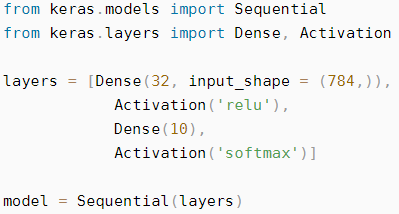
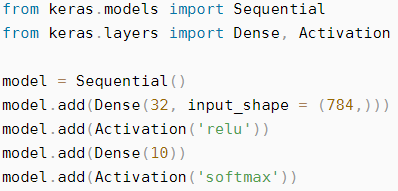

Model通用模型可以设计非常复杂、任意拓扑结构的神经网络，例如有向无环网络、共享层网络等。相比于序列模型只能依次线性逐层添加，通用模型能够比较灵活地构造网络结构，设定各层级的关系

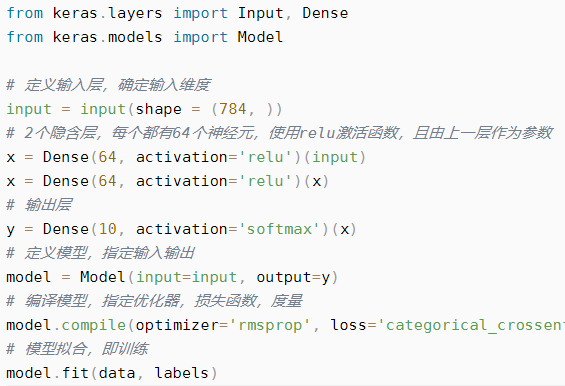

In [6]:
# A Basci Example - 1 
import numpy as np
from keras.models import Sequential # 堆叠模型，实质是一个容器
from keras.layers import Dense # Dense就是全连接层
data = np.random.random((100,100)) # 1000行 100列的矩阵
print(data[0])
labels = np.random.randint(2,size=(100,1)) # 1000行 1列的label 分两类
print(labels[:10])

# 构造模型
model = Sequential()
model.add(Dense(32, 
               activation='relu',
               input_dim=100)) 
model.add(Dense(1,activation='sigmoid'))

# 由于是静态图，所以要编译模型
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(data,labels,epochs=5,batch_size=32)
predictions = model.predict(data)
print(predictions[0])

[0.06032957 0.1250795  0.21432165 0.17391964 0.04151306 0.57945826
 0.57813293 0.97976528 0.33263233 0.87002097 0.60966913 0.32079793
 0.73579022 0.81974087 0.23872429 0.72679056 0.60147949 0.53554281
 0.56139373 0.72751695 0.32389863 0.68715029 0.78178765 0.15138557
 0.53203838 0.65806969 0.97724237 0.30111779 0.6245345  0.94329016
 0.53604136 0.57520706 0.6349226  0.76502915 0.09470715 0.99770177
 0.78607239 0.87782556 0.35003885 0.64814924 0.33822563 0.6935632
 0.19346861 0.04656125 0.13549293 0.70727613 0.17019183 0.80057982
 0.0979079  0.79174202 0.13426608 0.01640325 0.9327643  0.30148192
 0.11548153 0.75629659 0.29120831 0.39654253 0.09782581 0.54319236
 0.37971786 0.8413071  0.91439242 0.83809998 0.90937936 0.40214955
 0.05727968 0.97030625 0.77584936 0.49298132 0.85174976 0.5356414
 0.70315163 0.23615236 0.05134235 0.89179806 0.67880881 0.26305151
 0.59591597 0.66670542 0.18249267 0.72933763 0.54773476 0.64538423
 0.48158303 0.59590489 0.34641656 0.48697308 0.73310044 0.236083

Training -----------
train cost:  4.413288116455078
train cost:  0.1970498263835907
train cost:  0.03576512262225151
train cost:  0.010760502889752388

Testing ------------
1/1 [==============================] - 0s 103ms/step - loss: 0.0097
test cost: 0.00972366239875555
Weights= [[0.33830553]] 
biases= [1.9962587]


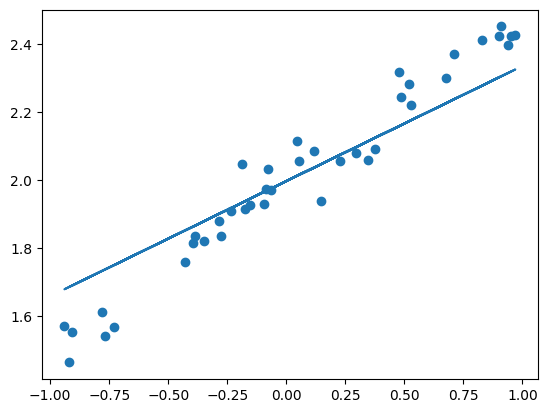

In [3]:
# 一个线性回归的模型例子
# _*_ coding: utf-8 _*_
# Regressor example
import numpy as np
np.random.seed(1337)  
from keras.models import Sequential 
from keras.layers import Dense
import matplotlib.pyplot as plt
# 创建数据集
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # 将数据集随机化
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, )) # 假设我们真实模型为：Y=0.5X+2
# 绘制数据集plt.scatter(X, Y)
plt.show()
X_train, Y_train = X[:160], Y[:160]     # 把前160个数据放到训练集
X_test, Y_test = X[160:], Y[160:]       # 把后40个点放到测试集
# 定义一个model，
model = Sequential () # Keras有两种类型的模型，序贯模型（Sequential）和函数式模型
                      # 比较常用的是Sequential，它是单输入单输出的
model.add(Dense(units=1, input_dim=1)) # 通过add()方法一层层添加模型
                                            # Dense是全连接层，第一层需要定义输入，
                                            # 第二层无需指定输入，一般第二层把第一层的输出作为输入
# 定义完模型就需要训练了，不过训练之前我们需要指定一些训练参数
# 通过compile()方法选择损失函数和优化器
# 这里我们用均方误差作为损失函数，随机梯度下降作为优化方法
model.compile(loss='mse', optimizer='sgd')
# 开始训练
print('Training -----------')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train) # Keras有很多开始训练的函数，这里用train_on_batch（）
    if step % 100 == 0:
        print('train cost: ', cost)
# 测试训练好的模型
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()    # 查看训练出的网络参数
                                        # 由于我们网络只有一层，且每次训练的输入只有一个，输出只有一个
                                        # 因此第一层训练出Y=WX+B这个模型，其中W,b为训练出的参数
print('Weights=', W, '\nbiases=', b)
# plotting the prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()

In [9]:
# 霍霍一下mnist吧
# _*_ coding: utf-8 _*_
# mnist
import numpy as np
np.random.seed(1337)  
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop
# import matplotlib.pyplot as plt
# 下载数据集
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 数据预处处理
X_train = X_train.reshape(X_train.shape[0], -1) / 255. 
X_test = X_test.reshape(X_test.shape[0], -1) / 255.  
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)
# 不使用model.add()，用以下方式也可以构建网络
model = Sequential([
    Dense(400, input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.summary()
# 定义优化器
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy']) # metrics赋值为'accuracy'，会在训练过程中输出正确率
# 这次我们用fit()来训练网路
print('Training ------------')
model.fit(X_train, y_train, epochs=4, batch_size=32)
print('\nTesting ------------')
# 评价训练出的网络
loss, accuracy = model.evaluate(X_test, y_test)
print('test loss: ', loss)
print('test accuracy: ', accuracy)
# plt.scatter(X_test, y_test)
# y_pred = model.predict(X_test)
# plt.plot(X_test, y_pred)
# plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 400)               314000    
_________________________________________________________________
activation_6 (Activation)    (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                4010      
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________
Training ------------
Epoch 1/4
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3365 - accuracy: 0.9008
Epoch 2/4
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0951 - accuracy: 0.9716
Epoch 3/4
1875/1875 

In [ ]:
# 下一个pretrained model - vgg16来霍霍mnist吧
'''
1.当服务器不能联网时，需要把模型*.h5文件下载到用户目录下的~/.keras/model，模型的预训练权重在载入模型时自动载入 
2. 通过以下代码加载VGG16：
'''

# 使用VGG16模型
from keras.applications.vgg16 import VGG16
print('Start build VGG16 -------')
# 获取vgg16的卷积部分，如果要获取整个vgg16网络需要设置:include_top=True
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
model_vgg16_conv.summary()
# 创建自己的输入格式
# if K.image_data_format() == 'channels_first':
#   input_shape = (3, img_width, img_height)
# else:
#   input_shape = (img_width, img_height, 3)
input = input(input_shape, name = 'image_input') # 注意，Keras有个层就是Input层
# 将vgg16模型原始输入转换成自己的输入
output_vgg16_conv = model_vgg16_conv(input)
# output_vgg16_conv是包含了vgg16的卷积层，下面我需要做二分类任务，所以需要添加自己的全连接层
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(512, activation='relu', name='fc2')(x)
x = Dense(128, activation='relu', name='fc3')(x)
x = Dense(1, activation='softmax', name='predictions')(x)
# 最终创建出自己的vgg16模型
my_model = Model(input=input, output=x)
# 下面的模型输出中，vgg16的层和参数不会显示出，但是这些参数在训练的时候会更改
print('\nThis is my vgg16 model for the task')
my_model.summary()

1.查看GPU使用情况语句（Linux）

    1秒钟刷新一次
    watch -n 1 nvidia-smi

2.指定显卡

    import os
    os.environ["CUDA_VISIBLE_DEVICES"] = "2"

3.GPU并行

    from model import unet
    G = 3 # 同时使用3个GPU
    with tf.device("/cpu:0"):
        M = unet(input_rows, input_cols, 1)
    model = keras.utils.training_utils.multi_gpu_model(M, gpus=G)
    model.compile(optimizer=Adam(lr=1e-5), loss='binary_crossentropy', metrics = ['accuracy'])
    model.fit(X_train, y_train,
           batch_size=batch_size*G, epochs=nb_epoch, verbose=0, shuffle=True,
           validation_data=(X_valid, y_valid))
    model.save_weights('/path_to_save/model.h5')

4.查看网络结构

    print (model.summary())
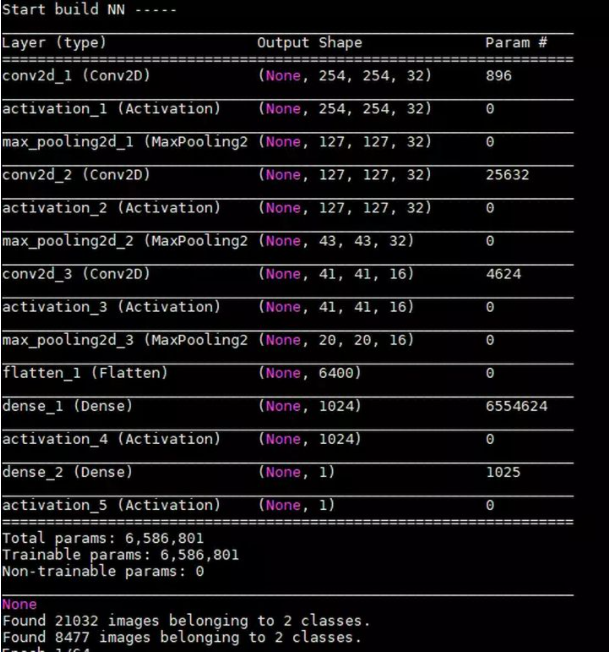

5.保存网络结构图

    # 你还可以用plot_model()来讲网络保存为图片
    plot_model(my_model, to_file='my_vgg16_model.png')

## 详细说明版本

### 库的导入

In [15]:
# 我们首先导入 Numpy，为电脑的伪随机数生成器设置一个种子数，这能让我们复现脚本中的结果：
import numpy as np
np.random.seed(123)  # for reproducibility
# 接着我们导入 Keras 中的序列模型类型，基本上是神经网络层的线性堆栈，非常适合我们本文要搭建的卷积神经网络。
from keras.models import Sequential
# 然后我们导入 Keras 中的“核心”层，这些层几乎在所有神经网络中都会用到：
from keras.layers import Dense, Dropout, Activation, Flatten
# 紧接着我们从 Keras 中导入 CNN 层，它们都是卷积层，能帮我们高效低用图像数据训练模型：
from  keras.layers import Convolution2D, MaxPooling2D
# 最后，我们导入一些实体程序，它们在后面会帮我们转换数据：
from  keras.utils import np_utils

### 数据的准备

In [ ]:
# eg.输入Numpy数据
import numpy as np

train_x = np.random.random((1000, 72))
train_y = np.random.random((1000, 10))

val_x = np.random.random((200, 72))
val_y = np.random.random((200, 10))

model.fit(train_x, train_y, epochs=10, batch_size=100,
          validation_data=(val_x, val_y))

In [ ]:
# eg.tf.data输入数据
dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))
dataset = dataset.batch(32)
dataset = dataset.repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((val_x, val_y))
val_dataset = val_dataset.batch(32)
val_dataset = val_dataset.repeat()

model.fit(dataset, epochs=10, steps_per_epoch=30,
          validation_data=val_dataset, validation_steps=3

In [22]:
# Keras 库中已经包含了 MNIST 数据集，我们可以这样将它加载：
from keras.datasets import mnist
 
# 将MNIST 数据加载为训练集和测试集
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
# 看看数据集的形状：
print(X_train.shape)

(60000, 28, 28)


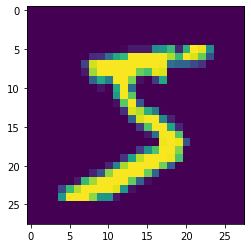

In [30]:
# 很好，看起来我们的训练集中有 6 万个样本，每张图像大小为 28 x 28 像素。
# 我们可以通过用 matplotlib 绘制第一个样本来确认一下：
from matplotlib import pyplot as plt
%matplotlib inline # 具体作用是当你调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在你的python console里面生成图像 
plt.imshow(X_train[0])

In [35]:
# 我们的 MNIST 图像只有 1 个深度，但我们必须明确声明这一点。换句话说，我们想将数据集的形状从[n，宽，高]转换为[n，深，宽，高]。通过以下方式，我们可以很容易地做到：
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# 可以再次打印 X_train 的维度进行确认：
print(X_train.shape)

(60000, 1, 28, 28)


In [34]:
# 输入数据的最后预处理步骤就是将数据类型转换为 float 型数据 32 位，将数据值正则化为 [0,1] 范围内。
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

现在，我们的输入数据已经可以用于模型训练了。



### 预处理标签

In [36]:
# 接着，我们看看类标签数据的形状：
print(y_train.shape)

(60000,)


In [37]:
# 看着有点问题，我们应该有 10 个不同的类，每个对应一个数字，但我们目前只有一个单维数组。我们瞧瞧前 10 个训练样本的标签：
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [38]:
# 但有个问题。Y_train 和 y_test 数据没有分割成 10 个不同的类标签，而是表示为只有类值的单个数组。
# 我们可以很容易地修正这个问题：
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [39]:
# 现在我们再看看数据：
print(Y_train.shape)

(60000, 10)


### 定义模型架构

tf.keras.layers中网络配置：

activation：设置层的激活函数。此参数由内置函数的名称指定，或指定为可调用对象。默认情况下，系统不会应用任何激活函数。

kernel_initializer 和 bias_initializer：创建层权重（核和偏差）的初始化方案。此参数是一个名称或可调用对象，默认为 "Glorot uniform" 初始化器。

kernel_regularizer 和 bias_regularizer：应用层权重（核和偏差）的正则化方案，例如 L1 或 L2 正则化。默认情况下，系统不会应用正则化函数。

In [ ]:
# eg.
layers.Dense(32, activation='sigmoid')
layers.Dense(32, activation=tf.sigmoid)
layers.Dense(32, kernel_initializer='orthogonal')
layers.Dense(32, kernel_initializer=tf.keras.initializers.glorot_normal)
layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.01))
layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l1(0.01))

In [ ]:
# eg.
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=[tf.keras.metrics.categorical_accuracy])

In [ ]:
# 首先声明一个序列模型格式：
model = Sequential()
# 接着，声明输入层：
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
'''输入形状参数应该为 1 个样本的形状，在这个情况下，还是（1,28,28），对应每张数字照片的形状（深，宽，高）。
但前 3 个参数表示的是什么？它们分别对应的是要使用的卷积过滤器的数量、每个卷积内核中的行数、每个卷积内核中的列数。
注：默认步幅大小为（1,1），可以通过‘subsample’参数进行调整。'''
print(model.output_shape)
'''我们通过打印当前模型输出的形状来进行确认：'''
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
'''Dropout 是一种方法能正则化我们的模型，防止出现过拟合。
MaxPooling2D 是一种减少模型中参数的方法，方式是在之前的层上滑动一个 2x2 的池化过滤器，在 2x2 过滤器中取 4 个值的最大值。
到了这里，我们已经添加了 2 个卷积层。为了让模型的架构更完整，我们还需要添加一个全连接层和一个输出层。'''
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
'''对于致密层（或全连接层），第一个参数时该层的输出大小。Keras 会自动处理层与层之间的连接。
注意，最后一层的输出大小为 10，对应了数字的 10 个类别。
同时也要注意到，卷积层的权重在传入全连接层之前必须扁平化（成为一维）'''

### 编译模型

现在只需编译模型，就可以训练它了。在我们编译模型时，会声明损失函数和优化器（SGD，Adam 等等）。

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
'''
eg.
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=[tf.keras.metrics.categorical_accuracy])
'''

要想拟合模型，我们只需声明训练模型时的批次大小和周期数量，然后传入我们的训练数据。

In [ ]:
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

你还可以使用很多种回调函数来设置 Early Stopping 的规则，顺便保存模型权重或记录每个训练周期的历史数据。

In [ ]:
# 最后，我们用测试数据评估搭建的模型：
score = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
# eg.评估与预测
test_x = np.random.random((1000, 72))
test_y = np.random.random((1000, 10))
model.evaluate(test_x, test_y, batch_size=32)
test_data = tf.data.Dataset.from_tensor_slices((test_x, test_y))
test_data = test_data.batch(32).repeat()
model.evaluate(test_data, steps=30)
# predict
result = model.predict(test_x, batch_size=32)
print(result)

## 奇淫巧计

### 函数式api

tf.keras.Sequential 模型是层的简单堆叠，无法表示任意模型。使用 Keras 函数式 API 可以构建复杂的模型拓扑，例如：

多输入模型，

多输出模型，

具有共享层的模型（同一层被调用多次），

具有非序列数据流的模型（例如，残差连接）。

使用函数式 API 构建的模型具有以下特征：

层实例可调用并返回张量。 输入张量和输出张量用于定义 tf.keras.Model 实例。 此模型的训练方式和 Sequential 模型一样。

In [ ]:
input_x = tf.keras.Input(shape=(72,))
hidden1 = layers.Dense(32, activation='relu')(input_x)
hidden2 = layers.Dense(16, activation='relu')(hidden1)
pred = layers.Dense(10, activation='softmax')(hidden2)

model = tf.keras.Model(inputs=input_x, outputs=pred)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=32, epochs=5)

### 模型子类化

通过对 tf.keras.Model 进行子类化并定义您自己的前向传播来构建完全可自定义的模型。在 init 方法中创建层并将它们设置为类实例的属性。在 call 方法中定义前向传播

In [ ]:
class MyModel(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(MyModel, self).__init__(name='my_model')
        self.num_classes = num_classes
        self.layer1 = layers.Dense(32, activation='relu')
        self.layer2 = layers.Dense(num_classes, activation='softmax')
    def call(self, inputs):
        h1 = self.layer1(inputs)
        out = self.layer2(h1)
        return out

    def compute_output_shape(self, input_shape):
        shape = tf.TensorShape(input_shape).as_list()
        shape[-1] = self.num_classes
        return tf.TensorShape(shape)

model = MyModel(num_classes=10)
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy'])

model.fit(train_x, train_y, batch_size=16, epochs=5)

### 自定义层

通过对 tf.keras.layers.Layer 进行子类化并实现以下方法来创建自定义层：

build：创建层的权重。使用 add_weight 方法添加权重。

call：定义前向传播。

compute_output_shape：指定在给定输入形状的情况下如何计算层的输出形状。 或者，可以通过实现 get_config 方法和 from_config 类方法序列化层。

In [ ]:
class MyLayer(layers.Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(MyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        shape = tf.TensorShape((input_shape[1], self.output_dim))
        self.kernel = self.add_weight(name='kernel1', shape=shape,
                                   initializer='uniform', trainable=True)
        super(MyLayer, self).build(input_shape)

    def call(self, inputs):
        return tf.matmul(inputs, self.kernel)

    def compute_output_shape(self, input_shape):
        shape = tf.TensorShape(input_shape).as_list()
        shape[-1] = self.output_dim
        return tf.TensorShape(shape)

    def get_config(self):
        base_config = super(MyLayer, self).get_config()
        base_config['output_dim'] = self.output_dim
        return base_config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

model = tf.keras.Sequential(
[
    MyLayer(10),
    layers.Activation('softmax')
])


model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy'])

model.fit(train_x, train_y, batch_size=16, epochs=5)

### 回调

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]
model.fit(train_x, train_y, batch_size=16, epochs=5,
         callbacks=callbacks, validation_data=(val_x, val_y))

### 权重保存

In [ ]:
model = tf.keras.Sequential([
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.save_weights('./weights/model')
model.load_weights('./weights/model')
model.save_weights('./model.h5')
model.load_weights('./model.h5')

### 保存网络结构

In [ ]:
# 序列化成json
import json
import pprint
json_str = model.to_json()
pprint.pprint(json.loads(json_str))
fresh_model = tf.keras.models.model_from_json(json_str)
# 保持为yaml格式  #需要提前安装pyyaml

yaml_str = model.to_yaml()
print(yaml_str)
fresh_model = tf.keras.models.model_from_yaml(yaml_str)

### 保存整个模型

In [ ]:
model = tf.keras.Sequential([
  layers.Dense(10, activation='softmax', input_shape=(72,)),
  layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=32, epochs=5)
model.save('all_model.h5')
model = tf.keras.models.load_model('all_model.h5')

### 将keras用于Estimator

Estimator API 用于针对分布式环境训练模型。它适用于一些行业使用场景，例如用大型数据集进行分布式训练并导出模型以用于生产

In [ ]:
model = tf.keras.Sequential([layers.Dense(10,activation='softmax'),
                          layers.Dense(10,activation='softmax')])

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

estimator = tf.keras.estimator.model_to_estimator(model)

# numpy

Numpy的基本数据结构和操作方法
       
       Numpy实际上是现在Python直接自带的一个库，毕竟矩阵运算是非常复杂的，如果将矩阵运算函数都自己手写会直接累死，并且python数据量多的情况下是很慢的，但是Numpy底层直接用C实现，达到了加速的效果，基本上Python在处理数据的时候几乎就是调用Numpy中的类型和方法。我们在做机器学习的时候必然会涉及到数据的整理、简单预处理、格式化等等问题，因此这些内容也得事先有所了解。当然，快速入门肯定不用一下子把Numpy的教程看完。但最起码的，Numpy中有哪些数据结构，这些数据结构的基本操作（加减乘除、排序、查找、矩阵的计算等）得要事先熟悉一遍。
       
推荐读物： 《从Python到Numpy》
www.labri.fr/perso/nrougier/from-python-to-numpy

## Quick Start

### 基本创建

In [2]:
import numpy as np
# Creating Arrays
a = np.array([1,2,3])
print(a,'\n')
b = np.array([(1.5,2,3),(4,5,6)])
print(b,'\n')
c = np.array([[(1.5,2,3),(4,5,6)],[(3,2,1),(4,5,6)]],dtype = float)
print(c)

[1 2 3] 

[[1.5 2.  3. ]
 [4.  5.  6. ]] 

[[[1.5 2.  3. ]
  [4.  5.  6. ]]

 [[3.  2.  1. ]
  [4.  5.  6. ]]]


In [4]:
a = np.zeros((3,2)) # 输出全为0或1的数组
print(a)
print(a.shape,'\n') # shape输出 （行数，列数）

a = np.ones((2,4))
print(a)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
(3, 2) 

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [5]:
a = np.arange(1,10) # 输出指定范围的数组
print(a)

[1 2 3 4 5 6 7 8 9]


In [7]:
a = np.linspace(0,1,5) # (范围1，范围2，输出个数)
print(a)

[0.   0.25 0.5  0.75 1.  ]


In [11]:
a = np.random.rand(2,4)
print(a)
print(type(a))
print(a.dtype) # 默认为64位浮点型

[[0.26301404 0.42276384 0.35914923 0.55876941]
 [0.77942788 0.1816015  0.81914411 0.32634007]]
<class 'numpy.ndarray'>
float64


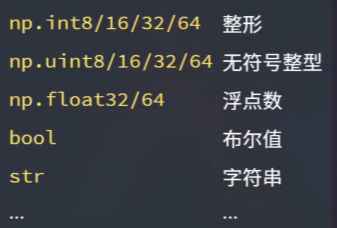

In [13]:
a = np.ones((2,4),dtype=np.int32) # 指定数据类型
print(a)

[[1 1 1 1]
 [1 1 1 1]]


In [19]:
a = np.ones((2,4)) # 更改数据类型
print(a)
print(a.dtype)
print()
b = a.astype(int)
print(b)
print(b.dtype)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
float64

[[1 1 1 1]
 [1 1 1 1]]
int32


### 基本运算

In [23]:
from dis import dis
a = np.array([1,2,3])
b = np.array([4,5,6])
print(a+b)  # 尺寸相同时直接四则运算，对应位置的元素相加减
print(a/b)

print(np.dot(a,b)) # 向量的点积运算

[5 7 9]
[0.25 0.4  0.5 ]
32


In [27]:
a = np.array([[1,2],[3,4]])
b = np.array([[2,0],[0,2]])
print(a@b)  # 进行矩阵的乘法运算， 等同于 np.matmul()

[[2 4]
 [6 8]]


In [37]:
a = np.array([1,2,3])
print(a * 5,'\n') # 直接与数运算，每个元素都会运算，叫做广播Broadcasting

# 不同尺寸的数组也可以直接做运算,numpy自动将两个数组扩展至相同的尺寸，然后相同位置的元素运算
a = np.array([[1],[10],[20]])
b = np.array([0,1,2])
'''扩充成 
1  1  1
10 10 10
20 20 20
和
0 1 2
0 1 2
0 1 2
'''
print(a+b)

[ 5 10 15] 

[[ 1  2  3]
 [10 11 12]
 [20 21 22]]


In [31]:
a = np.array([1,2,3])
print(np.sqrt(a)) # 对每个数依次求平方根
print(np.sin(a)) # 对每个数依次求sin
print(np.cos(a)) # 对每个数依次求cos
print(np.log(a)) # 对每个数依次做对数运算
print(np.power(a,2)) # 对每个数依次做指数运算

[1.         1.41421356 1.73205081]
[0.84147098 0.90929743 0.14112001]
[ 0.54030231 -0.41614684 -0.9899925 ]
[0.         0.69314718 1.09861229]
[1 4 9]


In [45]:
# 通过min max返回最小或者最大值
a = np.array([1,2,3,4,5])
print(a)
print('min :',a.min())
print('max :',a.max())
# argmin 和 argmax返回 最小或者最大值所在的索引
print('argmin :',a.argmin())
print('argmax :',a.argmax())
# sum返回所有数据的总和
print('sum :',a.sum())
print('mean :',a.mean())  # 返回平均值
print('median :',np.median(a))  # 返回中位数
print('var :',a.var()) # 返回数据方差
print('std :',a.std()) # 返回数据标准方差

[1 2 3 4 5]
min : 1
max : 5
argmin : 0
argmax : 4
sum : 15
mean : 3.0
median : 3.0
var : 2.0
std : 1.4142135623730951


In [48]:
# 当数据为高维的时候可以指定axis
a = np.array([[1,2,3,4,5],
             [5,6,7,8,9]])
print('sum :',a.sum(axis=0)) # 当axis = 0 时候，代表第一个维度即为↓列，它会将每一列↓中对应的数据相加
print('sum :',a.sum(axis=1)) # 当axis = 1 时候，代表第一个维度即为行→，它会将每一行→中对应的数据相加

sum : [ 6  8 10 12 14]
sum : [15 35]


### 取数操作

In [55]:
a = np.array([[1,2,3,4,5],
             [5,6,7,8,9]])
print(a[0,1]) # 按位置取数
print(a[a>3]) # 条件筛选，返回一个一维ndarray
print(a[(a>3)&(a%2 ==0 )]) # 复合筛选 &与 |或
print(a[(a>3)|(a%2 ==0 )])

2
[4 5 5 6 7 8 9]
[4 6 8]
[2 4 5 5 6 7 8 9]


In [65]:
# 切片语法
a = np.array([[1,2,3,4,5],
             [5,6,7,8,9]])
print(a[0, 0:2]) # 获取第一行但是1-2列的所有数据
print(a[0, :]) # 获取第一行但是所有列的所有数据
print(a[0],'\n') # 获取第一行但是所有列的所有数据

a = np.array([1,2,3,4,5,6,7,8,9])
print(a[0:9:2]) # 第二个冒号后面为跨度，此时跨度为2，每隔两个数取一个数
print(a[4:1:-2]) # 跨度取负数
print()
print(a[::-1]) # 经常数用的写法：翻转数组

[1 2]
[1 2 3 4 5]
[1 2 3 4 5] 

[1 3 5 7 9]
[5 3]

[9 8 7 6 5 4 3 2 1]


### 例子1：image processing

In [91]:
from PIL import Image
im = Image.open('xfan_headphoto.jpg')
# im.show()
im = np.array(im)
print(im.shape) # 525行 374列 3个颜色分量
print(im[100,100])
print(im.dtype)

im_downsample = im[::10,::10,:] # 对图片进行降采样
# Image.fromarray(im_downsample).show()

im_flipped = im[::-1,:,:] # 对图片进行反转
# Image.fromarray(im_flipped).show()

im_cropped = im[40:500,50:350,:]  # 对图片进行切片
Image.fromarray(im_cropped).show()

(525, 374, 3)
[40 39 35]
uint8


In [75]:
# 单独提取红色分量
im_r = im[:,:,0]
Image.fromarray(im_r).show()

In [80]:
# 两张图片按比例混一起
im1 = np.array(Image.open('xfan_headphoto.jpg'))
im1 = im1[0:449,0:319,:]
im2 = np.array(Image.open('xfan_workphoto.jpg'))
im_blend = im1 * 0.4 + im2 * 0.6 # 此时运算的结果时浮点数
im_blend = im_blend.astype(np.uint8)
Image.fromarray(im_blend).show()

In [86]:
# 生成图片
a = np.random.rand(200,200,3)
a = a.astype(np.uint8)
Image.fromarray(a).show()

### numpy - I/O

In [95]:
from PIL import Image
im = Image.open('xfan_headphoto.jpg')
im = np.array(im)

im_flipped = im[:,::-1,:] # 对图片进行反转
# Image.fromarray(im_flipped).show()

im_downsample = im[::3,::3,:] # 对图片进行降采样
# Image.fromarray(im_downsample).show()

In [96]:
np.save('downsample_xfphoto',im_downsample)
np.save('flip_xfphoto',im_flipped)

## numpy学习

### ndarray
    ndarray 对象是用于存放同类型元素的多维数组。
    ndarray 中的每个元素在内存中都有相同存储大小的区域。
 
ndarray 内部由以下内容组成：

    一个指向数据（内存或内存映射文件中的一块数据）的指针。
    数据类型或 dtype，描述在数组中的固定大小值的格子。
    一个表示数组形状（shape）的元组，表示各维度大小的元组。
    一个跨度元组（stride），其中的整数指的是为了前进到当前维度下一个元素需要"跨过"的字节数。
    
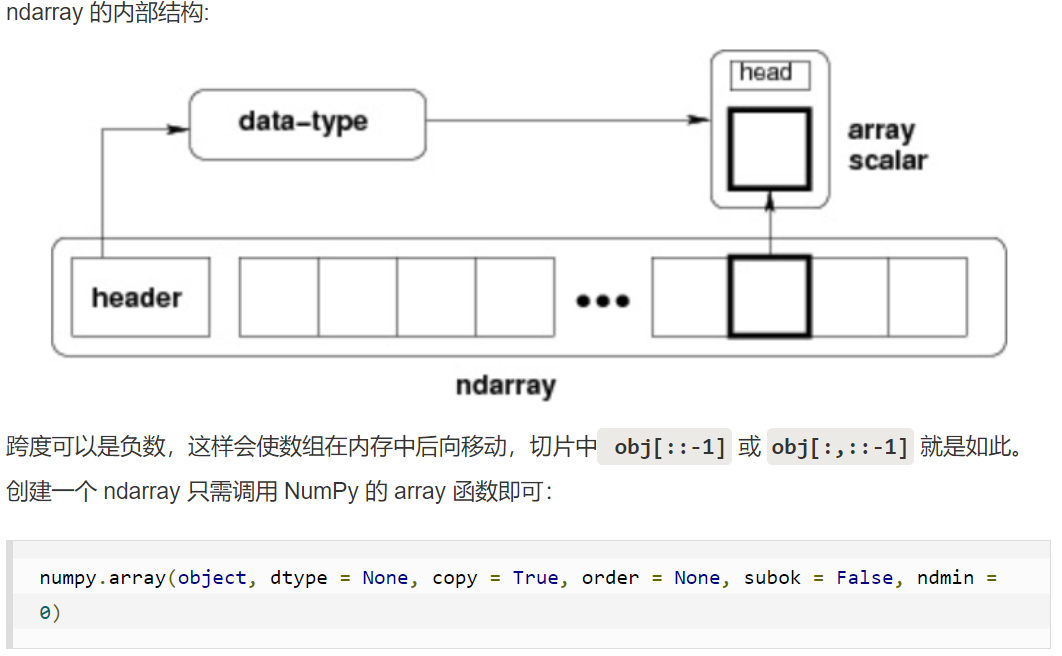
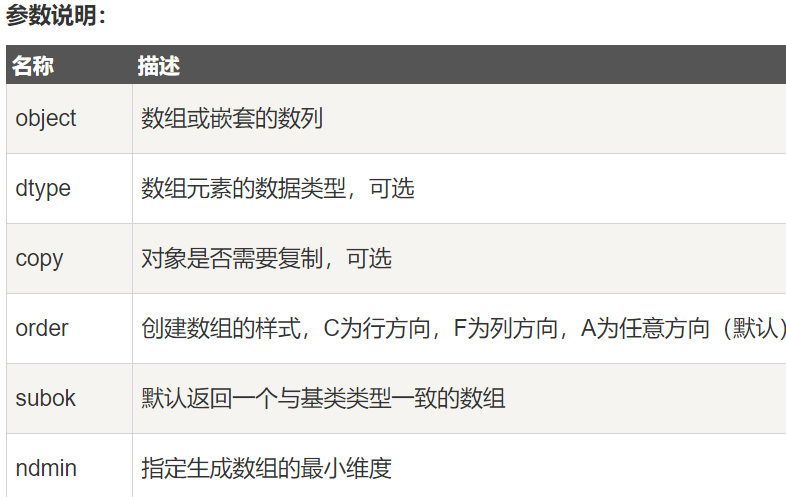

In [1]:
import numpy as np
a = np.array([1,2,3])
print(a)

[1 2 3]


In [4]:
# 多于一个维度
import numpy as np
a = np.array([[1,2],[3,4]])
print(a)

[[1 2]
 [3 4]]


In [5]:
# 最小维度  
import numpy as np 
a = np.array([1,  2,  3,4,5], ndmin =  2)  
print (a)

[[1 2 3 4 5]]


In [6]:
# dtype 参数  
import numpy as np 
a = np.array([1,  2,  3], dtype = complex)  
print (a)

[1.+0.j 2.+0.j 3.+0.j]


ndarray 对象由计算机内存的连续一维部分组成，并结合索引模式，将每个元素映射到内存块中的一个位置。内存块以行顺序(C样式)或列顺序(FORTRAN或MatLab风格，即前述的F样式)来保存元素。

### 数据类型对象 (dtype)

数据类型对象（numpy.dtype 类的实例）用来描述与数组对应的内存区域是如何使用，它描述了数据的以下几个方面：：

    数据的类型（整数，浮点数或者 Python 对象）
    数据的大小（例如， 整数使用多少个字节存储）
    数据的字节顺序（小端法或大端法）
    在结构化类型的情况下，字段的名称、每个字段的数据类型和每个字段所取的内存块的部分
    如果数据类型是子数组，那么它的形状和数据类型是什么。
字节顺序是通过对数据类型预先设定 < 或 > 来决定的。 < 意味着小端法(最小值存储在最小的地址，即低位组放在最前面)。> 意味着大端法(最重要的字节存储在最小的地址，即高位组放在最前面)。

dtype 对象是使用以下语法构造的：

# pandas

Pandas - 读写数据的利器
        
     当然也要强调一点Pandas并不是读写数据唯一的方法。只不过直接用Python自带的方法来做太过繁琐，而其它的库虽然也有，但目前能像Pandas一样既完整又好用的也不是太多。举个例子，比如我们要读一个csv文件中的数据，用Pandas也就一句data = pandas.read_csv('data.csv')就行了。查询整理数据更是有类似SQL一样的机制。那么这个工具很显然能给我们提供极大的便利。

# sklearn

sklearn全称 scikit-learn，它是一个集成了目前市面上最常用的机器学习模型的库，使用起来非常轻松简单，因此获得了广泛的应用。

从官网显示数据来看，这个项目始于2007年，工具箱在2011年正式发布，并且在机器学习顶级杂志 Journal of Machine Learning Research 发表了对应的论文。能在JMLR上发文章就已经能说明该工具箱的水平不一般。论文全文可以直接在官网免费下载。

sklearn真是太强大了，里面分装了绝大部分我们常见的机器学习算法，熟悉这些算法的用法，可以让我们省去重复造轮子的时间，把更多的精力面对我们要解决的问题。所以，如果你不是特别的强迫症患者，还是使用自带的算法，因为这些自带的算法都是经过很多人检验，优化，兼顾速度和精度上的优点。

## 一个用KNN做iris的快速入门例子

In [55]:
'''准备工作'''
# 引入数据集，sklearn包含众多数据集
import sklearn
from sklearn import datasets
# 将数据分为测试集和训练集
from sklearn.model_selection import train_test_split
# 利用邻近点方式训练数据
from sklearn.neighbors import KNeighborsClassifier
# 引入数据,本次导入鸢尾花数据，iris数据包含4个特征变量
iris = datasets.load_iris()

In [63]:
dir(sklearn)

In [22]:
print(type(iris))
for thing in iris:
    print(thing)

<class 'sklearn.utils.Bunch'>
data
target
frame
target_names
DESCR
feature_names
filename


In [31]:
print(iris.filename)
print(iris.feature_names)
print(iris.target_names)

D:\Anaconda\envs\Deep\lib\site-packages\sklearn\datasets\data\iris.csv
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [24]:
# dir(datasets)
# help(datasets.load_iris)
'''查看函数说明的两大法宝: dir help'''

'查看函数说明的两大法宝: dir help'

In [37]:
# 特征变量
iris_X = iris.data
print(type(iris_X))
print('特征变量的长度',len(iris_X))
print('每一行的长度',len(iris_X[0]))
print(iris.feature_names)
print(iris_X[0])

<class 'numpy.ndarray'>
特征变量的长度 150
每一行的长度 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[5.1 3.5 1.4 0.2]


In [39]:
# 目标值
iris_y = iris.target
print(type(iris_y))
print('鸢尾花的目标值',len(iris_y))
print(iris.target_names)
print(iris_y)

<class 'numpy.ndarray'>
鸢尾花的目标值 150
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [46]:
# 利用train_test_split进行训练集和测试机进行分开，test_size占30%
X_train,X_test,y_train,y_test=train_test_split(iris_X,iris_y,test_size=0.3)
# 我们看到训练数据的特征值分为3类
print(y_train)
# print(X_test)

[2 0 1 1 0 1 1 2 1 2 0 0 1 2 0 0 1 0 1 2 0 2 1 1 0 2 1 0 1 2 1 0 1 2 1 1 2
 2 1 0 0 2 2 0 0 1 0 1 1 0 1 1 1 1 0 2 1 0 1 1 1 0 2 2 1 2 0 2 0 2 0 0 2 0
 2 2 1 1 0 2 0 2 2 2 1 1 2 1 2 1 1 2 0 1 0 1 2 0 1 2 1 0 0 2 2]


In [50]:
# 一步就train好
knn = KNeighborsClassifier()
# 进行填充测试数据进行训练
knn.fit(X_train,y_train)

params = knn.get_params()
print(params)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [51]:
score = knn.score(X_test,y_test)
print("预测得分为：%s"%score)

预测得分为：0.9555555555555556


In [53]:
# 预测数据，预测特征值
print(knn.predict(X_test))
# 打印真实特征值
print(y_test)

[1 0 2 2 0 1 2 2 0 2 2 0 2 2 2 1 1 0 0 2 0 1 0 1 0 1 0 0 0 0 1 0 2 2 0 1 1
 2 0 1 2 2 1 0 0]
[1 0 2 2 0 2 2 2 0 2 2 0 2 2 2 1 1 0 0 2 0 1 0 1 0 1 0 0 0 0 1 0 2 2 0 2 1
 2 0 1 2 2 1 0 0]


That's all, over. Faking easy man

## 文本例子

使用二分类情感分析的数据集做，理论上来说，将对应的文本和标签转换成两个ndarray就可以，可以使用自己创建vocab和tokenize的方式，也可以使用torch_bert的tokenizer

## 数据预处理

In [53]:
import numpy as np
import fanTools
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [179]:
# # 第一步: Tokenize
# sen = "我今天中午去餐车吃了鸡肉饭和一瓶饮料"
# def sentence_get_BERT_Token(samples):
#     '''利用online的库做tokenize，适合小数据'''
#     import torch
#     from pytorch_transformers import BertTokenizer
#     model_name = 'bert-base-chinese'
#     tokenizer = BertTokenizer.from_pretrained(model_name)
#     tokenized_text = [tokenizer.tokenize(i) for i in samples]
#     input_ids = [tokenizer.convert_tokens_to_ids(i) for i in tokenized_text]
#     res = []
#     for i in input_ids:
#         res.extend(i)
#     return res
# res = sentence_get_BERT_Token(sen)
# res
# # g = np.array(res,dtype=int)
# # g

In [3]:
# 文本分类数据集路径
posdata_path = '../re_datasets/clothing_comment_情感分析/posdata.txt'
negdata_path = '../re_datasets/clothing_comment_情感分析/negdata.txt'

In [4]:
# 读入数据集
pos_list = fanTools.read_file_to_list(posdata_path)
neg_list = fanTools.read_file_to_list(negdata_path)
print('positive instance',pos_list[0])
print('negative instance',neg_list[0])
len(pos_list), len(neg_list)

positive instance 质量好,做工也不错,尺码标准,
negative instance 穿上不舒服，颜色和质感跟图片差异很大，建议慎重购买！后悔了！


(1500, 1500)

In [5]:
from string import punctuation
punc = punctuation + u'.,;《》？！“”‘’@#￥%…&×（）——+【】{};；●，。&～、|\s:：'
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~.,;《》？！“”‘’@#￥%…&×（）——+【】{};；●，。&～、|\\s:：'

In [6]:
import re
def rm_marks(str):
    str1 = re.sub(r"[{}]".format(punc),'',str)
    return str1

In [7]:
import random
# data_all = []
# label_all = []
pos_all = [[i,1] for i in pos_list]
neg_all = [[j,0] for j in neg_list]
data_all = pos_all + neg_all
random.shuffle(data_all)
data_all[:10]

[['质量是我想要的，男票穿着正好！下次有机会还来', 1],
 ['客服态度很好，裤子质量也不错，物流也快。很值的一次购物！！好评！！', 1],
 ['大小合适，质量不错，穿在身上效果很好', 1],
 ['挺差的，会起毛球', 0],
 ['穿上感觉挺舒服，这裤子质量还不错', 1],
 ['我实在想不通这样的裤子怎么达到98的好评率，特粘毛，还显脏。难道京东要像*台一样假货横行？人家越做越好，你呢', 0],
 ['你们发货没看码数的？', 0],
 ['差评给物流，看到已签收，不打电话还不知道签到哪里了，很不满意', 0],
 ['衣服穿在身上挺舒适的，满意的一次购物', 1],
 ['质量差，有色差，联系客服全是专业术语回复，无语，差差差差评', 0]]

In [8]:
data_X = [i[0] for i in data_all]
data_y = [i[1] for i in data_all]
data_X[:5], data_y[:5]

(['质量是我想要的，男票穿着正好！下次有机会还来',
  '客服态度很好，裤子质量也不错，物流也快。很值的一次购物！！好评！！',
  '大小合适，质量不错，穿在身上效果很好',
  '挺差的，会起毛球',
  '穿上感觉挺舒服，这裤子质量还不错'],
 [1, 1, 1, 0, 1])

In [9]:
'''本地的bert来做tokenize'''
from tqdm import tqdm
from transformers import BertTokenizer
bert_path = "../pretrained_model/chinese_roberta_wwm_ext_pytorch/"  # 该文件夹下存放三个文件（'vocab.txt', 'pytorch_model.bin', 'config.json'）
tokenizer = BertTokenizer.from_pretrained(bert_path,
                                          local_files_only=True)  # 初始化分词器
data_X1, input_masks, input_types, = [], [], []
labels = []  # 标签
maxlen = 40  # 取30即可覆盖99%

for i, line in tqdm(enumerate(data_X)):
    title = line
    encode_dict = tokenizer.encode_plus(text=title,
                                        max_length=maxlen,
                                        padding='max_length',
                                        truncation=True)

    data_X1.append(encode_dict['input_ids'])

len(data_X1)

3000it [00:01, 1983.98it/s]


3000

In [10]:
len(data_y)

3000

In [11]:
# 利用train_test_split进行训练集和测试机进行分开，test_size占30%
X_train,X_test,y_train,y_test=train_test_split(data_X1,data_y,test_size=0.3)
print(X_train[0])

[101, 6821, 784, 720, 6175, 2094, 8024, 743, 1726, 3341, 6407, 6407, 8024, 2218, 3766, 4959, 6814, 8024, 3332, 3160, 2345, 4638, 679, 6121, 8024, 6820, 3766, 6125, 6804, 1765, 3033, 8114, 2571, 671, 816, 4638, 1962, 511, 102, 0]


In [12]:
len(X_train),len(X_test),len(y_train),len(y_test)

(2100, 900, 2100, 900)

## 数据预处理 - sklearn的trick

In [44]:
from sklearn import preprocessing

### 数据归一化

In [47]:
# 为了使得训练数据的标准化规则与测试数据的标准化规则同步，preprocessing中提供了很多Scaler：
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
train_data = [[66, 213], [77, 0], [99, 1], [3252, 1]]
test_data = [[546, 1], [3251, 1], [15243, 1], [4325, 1]]
# 1. 基于mean和std的标准化
scaler = preprocessing.StandardScaler().fit(train_data)
scaler.transform(train_data)
scaler.transform(test_data)

# 2. 将每个特征值归一化到一个固定范围
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(train_data)
scaler.transform(train_data)
scaler.transform(test_data)
#feature_range: 定义归一化范围，注用（）括起来

array([[1.50659134e-01, 4.69483568e-03],
       [9.99686127e-01, 4.69483568e-03],
       [4.76365348e+00, 4.69483568e-03],
       [1.33678594e+00, 4.69483568e-03]])

### 正则化（normalize）

In [48]:
# 当你想要计算两个样本的相似度时必不可少的一个操作，就是正则化。其思想是：首先求出样本的p-范数，然后该样本的所有元素都要除以该范数，这样最终使得每个样本的范数都为1。
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')
X_normalized                                      

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

### one-hot编码

In [50]:
# one-hot编码是一种对离散特征值的编码方式，在LR模型中常用到，用于给线性模型增加非线性能力
data = [[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]]
encoder = preprocessing.OneHotEncoder().fit(data)
encoder.transform(data).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])

### 数据集拆分

In [ ]:
# 　在得到训练数据集时，通常我们经常会把训练数据集进一步拆分成训练集和验证集，这样有助于我们模型参数的选取。
# 作用：将数据集划分为 训练集和测试集
# 格式：train_test_split(*arrays, **options)
from sklearn.model_selection import train_test_split
"""
参数
---
arrays：样本数组，包含特征向量和标签

test_size：
　　float-获得多大比重的测试样本 （默认：0.25）
　　int - 获得多少个测试样本

train_size: 同test_size

random_state:
　　int - 随机种子（种子固定，实验可复现）
　　
shuffle - 是否在分割之前对数据进行洗牌（默认True）

返回
---
分割后的列表，长度=2*len(arrays), 
　　(train-test split)
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 模型的选择与训练

In [13]:
# MLP多层感知机（神经网络）的解法
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='adam',hidden_layer_sizes=(2000,2000),verbose=10, 
                      random_state=1,warm_start=True, early_stopping=True)
"""参数
---
    hidden_layer_sizes: 元祖
    activation：激活函数
    solver ：优化算法{‘lbfgs’, ‘sgd’, ‘adam’}
    alpha：L2惩罚(正则化项)参数。
"""
params = model.get_params()
params

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': True,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (2000, 2000),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 10,
 'warm_start': True}

In [18]:
# 线性回归
from sklearn.linear_model import LinearRegression
# 定义线性回归模型
model = LinearRegression(fit_intercept=True, normalize=False, 
    copy_X=True, n_jobs=1)
"""
参数
---
    fit_intercept：是否计算截距。False-模型没有截距
    normalize： 当fit_intercept设置为False时，该参数将被忽略。 如果为真，则回归前的回归系数X将通过减去平均值并除以l2-范数而归一化。
     n_jobs：指定线程数
"""
params = model.get_params()
params

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}

In [42]:
#  逻辑回归LR
from sklearn.linear_model import LogisticRegression
# 定义逻辑回归模型
"""参数
---
    penalty：使用指定正则化项（默认：l2）
    dual: n_samples > n_features取False（默认）
    C：正则化强度的反，值越小正则化强度越大
    n_jobs: 指定线程数
    random_state：随机数生成器
    fit_intercept: 是否需要常量
"""
model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
    fit_intercept=True, intercept_scaling=1, class_weight=None, 
    random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
    verbose=0, warm_start=False, n_jobs=1)
params = model.get_params()
params

In [20]:
# 支持向量机SVM
from sklearn.svm import SVC
model = SVC(C=1.0, kernel=’rbf’, gamma=’auto’)
"""参数
---
    C：误差项的惩罚参数C
    gamma: 核相关系数。浮点数，If gamma is ‘auto’ then 1/n_features will be used instead.
"""
params = model.get_params()
params

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [38]:
#  朴素贝叶斯算法NB
from sklearn import naive_bayes
"""
文本分类问题常用MultinomialNB
参数
---
    alpha：平滑参数
    fit_prior：是否要学习类的先验概率；false-使用统一的先验概率
    class_prior: 是否指定类的先验概率；若指定则不能根据参数调整
    binarize: 二值化的阈值，若为None，则假设输入由二进制向量组成
"""
model = naive_bayes.GaussianNB() # 高斯贝叶斯
# model = naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
# model = naive_bayes.BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
params = model.get_params()
params

In [ ]:
# 决策树DT
from  sklearn  import  tree 
"""参数
---
    criterion ：特征选择准则gini/entropy
    max_depth：树的最大深度，None-尽量下分
    min_samples_split：分裂内部节点，所需要的最小样本树
    min_samples_leaf：叶子节点所需要的最小样本数
    max_features: 寻找最优分割点时的最大特征数
    max_leaf_nodes：优先增长到最大叶子节点数
    min_impurity_decrease：如果这种分离导致杂质的减少大于或等于这个值，则节点将被拆分。
"""
model = tree.DecisionTreeClassifier(criterion=’gini’, max_depth=None, 
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
    max_features=None, random_state=None, max_leaf_nodes=None, 
    min_impurity_decrease=0.0, min_impurity_split=None,
     class_weight=None, presort=False)
params = model.get_params()
params

# matplotlib

Matplotlib - 绘图工具

    绘图这件事在任何数据处理中其实都有非常重要的作用，因为它能最直观地给我们反馈各种结果，从而加深我们对结果的理解。Matplotlib基本上能够满足我们对基本的数据结果的各种展示需求。其中的pyplot模块用法也基本和其它一些常用的语言差不多，基本上只要用过类似R、Matlab等语言画过图的，看几分钟文档就能弄明白怎么画曲线图了。